# Prediction of Smoking and Drinking Behaviors Using NHIS Korea Dataset
# Minju Kim
# Saransh Singh
# Vaishnavi Pawar

# 1. EDA (Exploratory Data Analysis)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
data = pd.read_csv("/content/smoking_driking_dataset_Ver01.csv")

data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  

[5 rows x 24 columns]

- Data Description:
1. Source: This dataset is sourced from the National Health Insurance Service in Korea.

2. Privacy: All personal and sensitive information has been excluded.

- Dataset Purpose:

1. To analyze body signals.
2. To classify individuals based on their smoking and drinking habits.

- Dataset Details:
1. "Sex"	Gender of the individual: Male or Female.
2. "Age"	Age of the individual, rounded up to the nearest 5 years.
3. "Height"	Height of the individual, rounded up to the nearest 5 cm.
4. "Weight"	Weight of the individual in kilograms (kg).
5. "Sight_left"	Eyesight measure for the left eye.
6. Sight_right	Eyesight measure for the right eye.
7. Hear_left	Hearing status for the left ear: 1 (Normal), 2 (Abnormal).
8. Hear_right	Hearing status for the right ear: 1 (Normal), 2 (Abnormal).
9. SBP	Systolic blood pressure in mmHg.
10. DBP	Diastolic blood pressure in mmHg.
11. BLDS	Fasting blood glucose level in mg/dL.
12. Tot_chole	Total cholesterol level in mg/dL.
13. HDL_chole	HDL cholesterol level in mg/dL.
14. LDL_chole	LDL cholesterol level in mg/dL.
15. Triglyceride	Triglyceride level in mg/dL.
16. Hemoglobin	Hemoglobin concentration in g/dL.
17. Urine_protein	Protein presence in urine, ranging from 1(-) to 6(+4).
18. Serum_creatinine	Blood creatinine concentration in mg/dL.
19. SGOT_AST	SGOT or AST level in IU/L.
20. SGOT_ALT	ALT enzyme level in IU/L.
21. Gamma_GTP	Gamma-glutamyl transpeptidase level in IU/L.
22. SMK_stat_type_cd	Smoking status: 1 (Never Smoked), 2 (Ex-Smoker), 3 (Smoker).
23. DRK_YN	Drinking status: Y (Drinker), N (Non-Drinker).

- The categorical columns: "sex", "hear_left", "hear_right", "SMK_stat_type_cd", and "DRK_YN"



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


- No missing values exist in this data set.

In [ ]:
print("Statistical Summary:\n", data.describe())

Statistical Summary:
                  age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%        

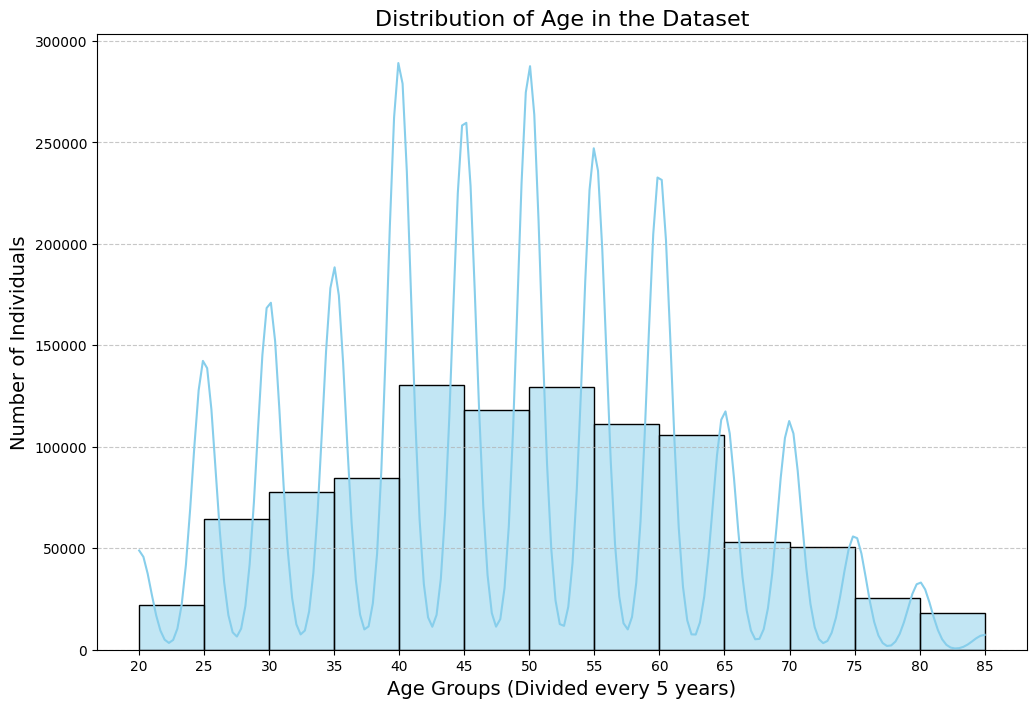

In [ ]:
# Enhancing the age distribution plot with clearer labels and more detailed age group division
plt.figure(figsize=(12, 8))
sns.histplot(data['age'], bins=range(data['age'].min(), data['age'].max() + 1, 5), kde=True, color='skyblue')
plt.title('Distribution of Age in the Dataset', fontsize=16)
plt.xlabel('Age Groups (Divided every 5 years)', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(range(data['age'].min(), data['age'].max() + 1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the age distribution graph of your dataset, we can derive several insights:

- Age Range and Concentration: The histogram shows the range of ages present in the dataset and which age groups are most heavily represented. There are noticeable peaks in certain age groups, indicating a higher concentration of individuals in those age brackets.

- Age-Related Health Variations: As people age, they are more likely to experience changes in health metrics such as blood pressure, cholesterol, and blood glucose levels. Since our dataset has a significant proportion of older individuals, this might explain the presence of outliers in health-related columns. Older individuals are more likely to have health conditions that result in measurements that deviate significantly from the mean, thus appearing as outliers.





In [ ]:
sex_counts = data['sex'].value_counts()

print(sex_counts)

Male      526415
Female    464931
Name: sex, dtype: int64


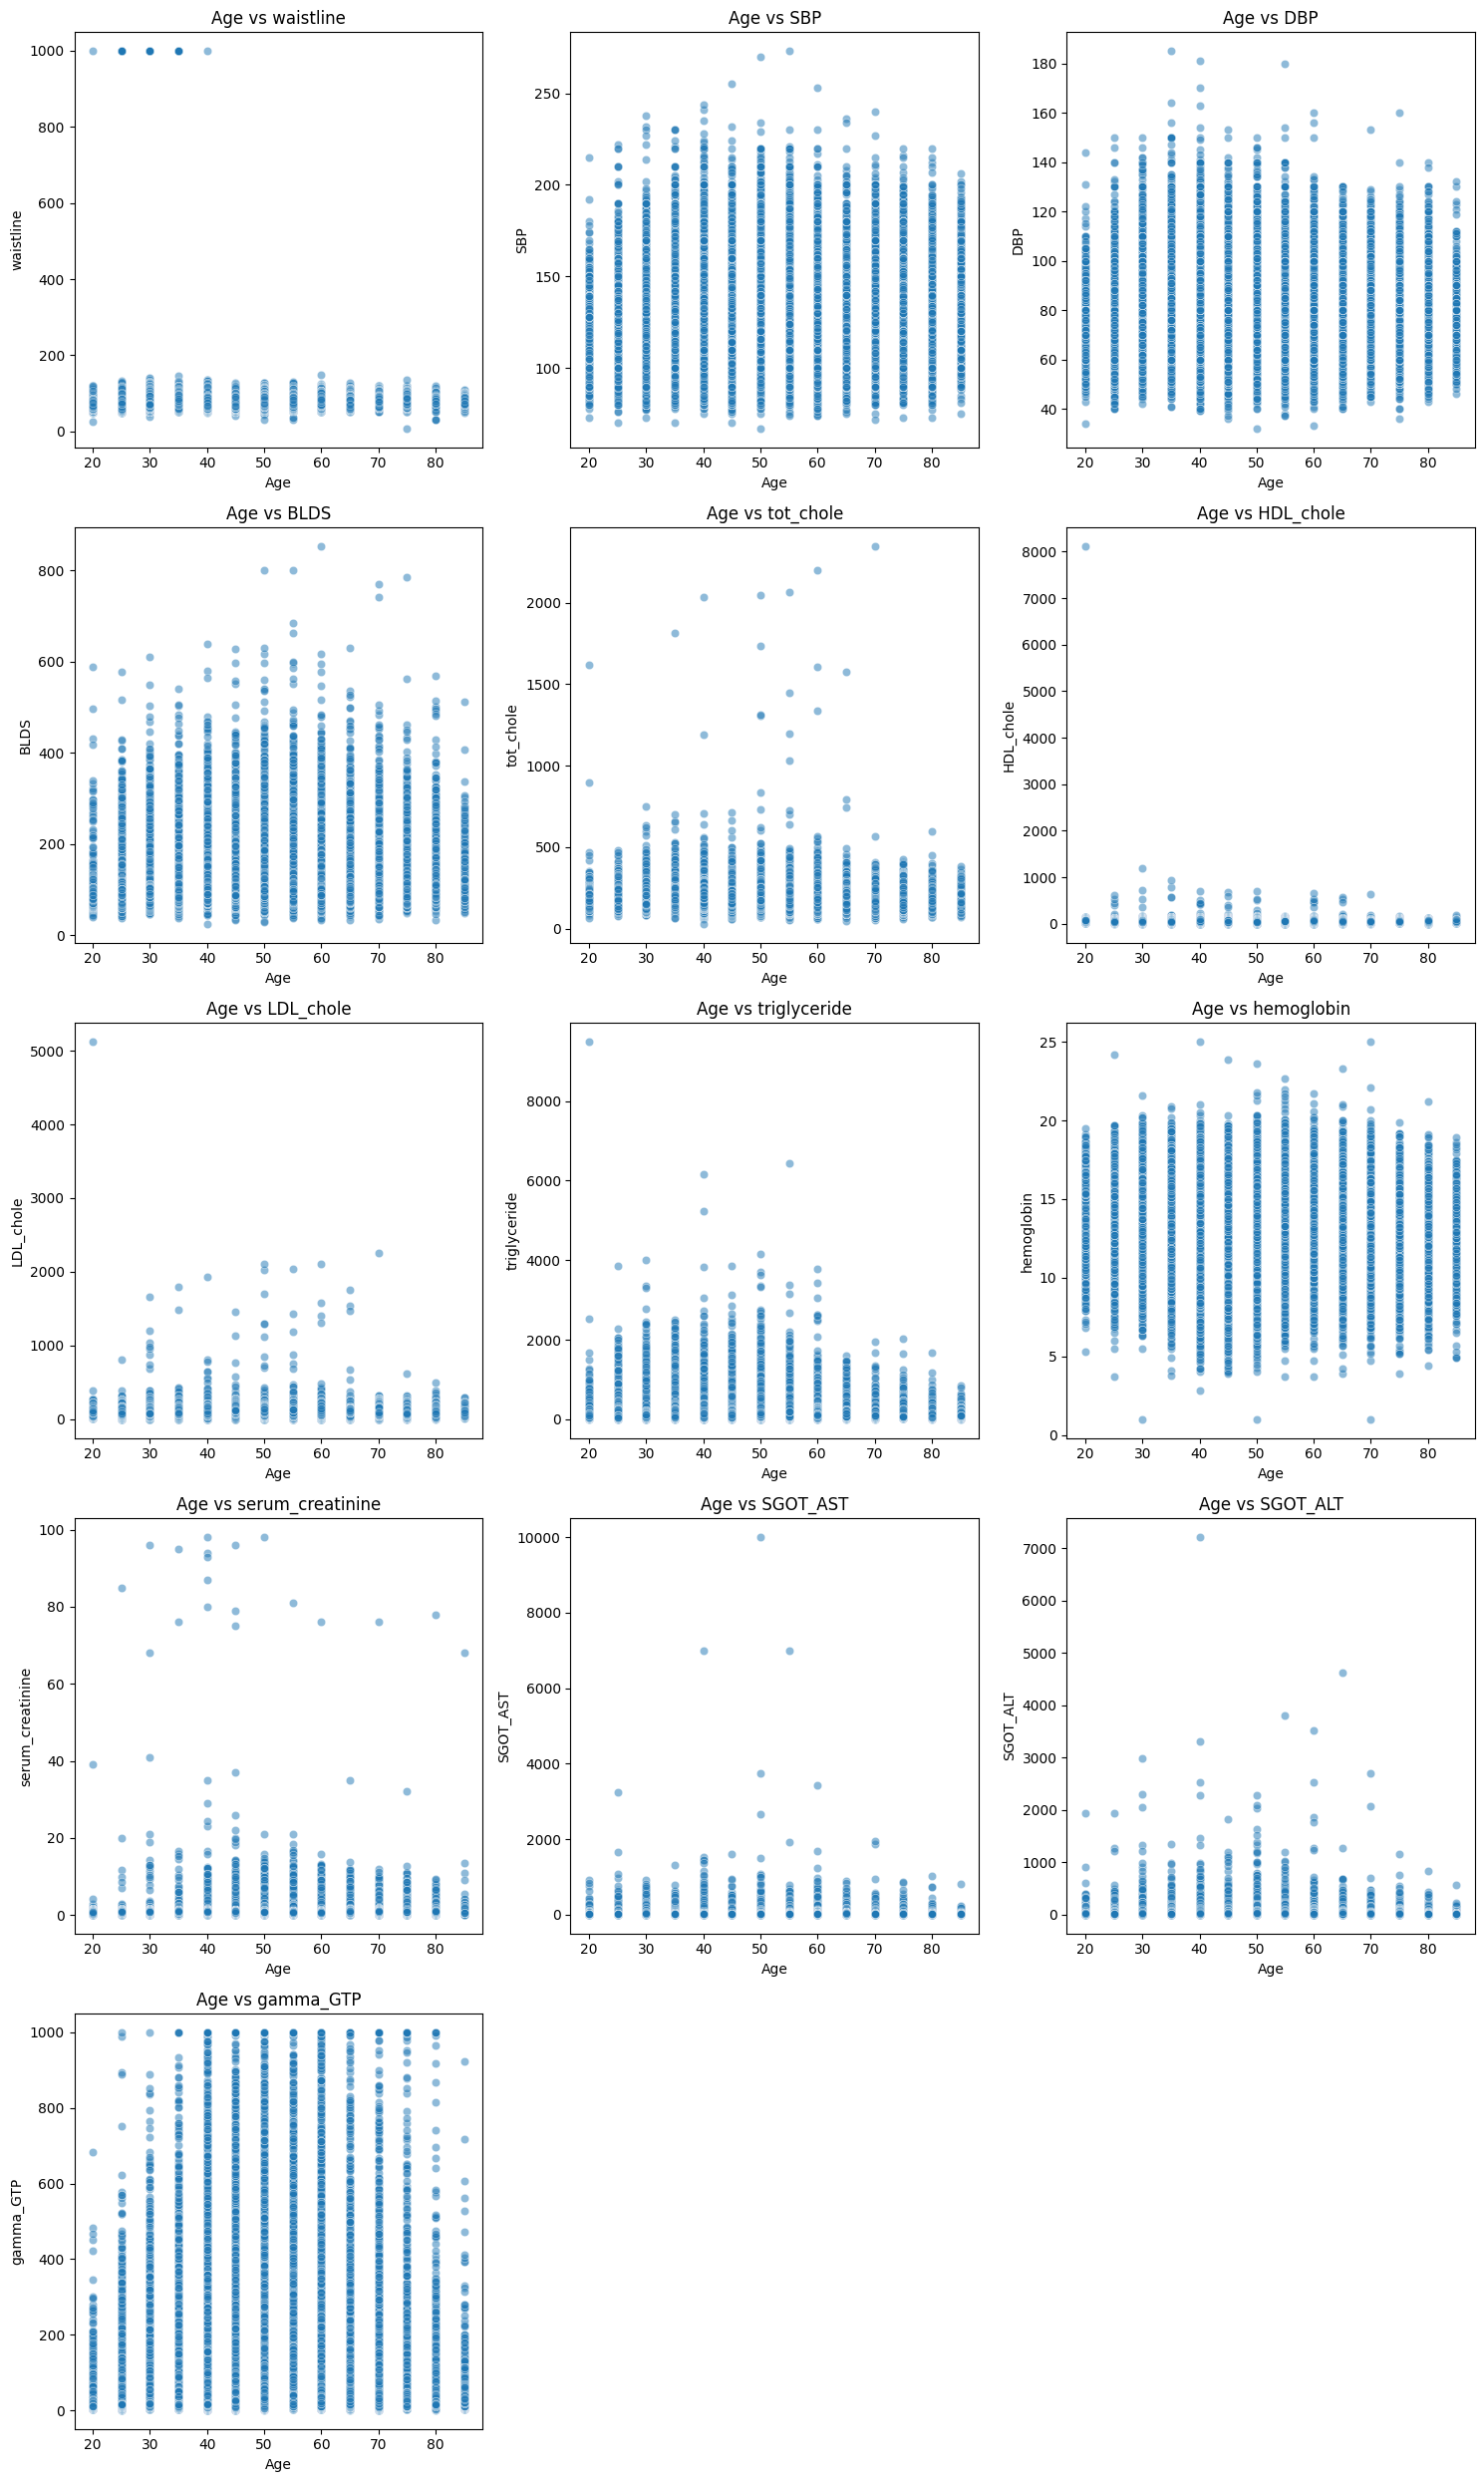

In [ ]:
# Selecting columns with many outliers and the age column for plotting
columns_with_outliers = [
    "waistline", "SBP", "DBP", "BLDS", "tot_chole",
    "HDL_chole", "LDL_chole", "triglyceride", "hemoglobin",
    "serum_creatinine", "SGOT_AST", "SGOT_ALT", "gamma_GTP"
]

# Plotting scatter plots for each of these columns against age
num_cols = 3
num_rows = len(columns_with_outliers) // num_cols + (1 if len(columns_with_outliers) % num_cols else 0)
plt.figure(figsize=(15, num_rows * 5))

for index, column in enumerate(columns_with_outliers, 1):
    plt.subplot(num_rows, num_cols, index)
    sns.scatterplot(x=data['age'], y=data[column], alpha=0.5)
    plt.title(f'Age vs {column}')
    plt.xlabel('Age')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

###Analyzing the scatter plot with "age" column and columns with outliers
1. Age vs Waistline:

- There is a general increase in waistline with age, especially noticeable after middle age.
- Outliers with very high waistline measurements are present across all age groups but are more pronounced in middle to older age groups.
Age vs SBP (Systolic Blood Pressure):

2. SBP tends to increase with age.
- There are outliers with extremely high SBP across various age groups, more so in the older population.
3. Age vs DBP (Diastolic Blood Pressure):

- DBP shows less clear age-related trends compared to SBP.
- Outliers are present in all age groups, indicating individual variations in DBP.
4. Age vs BLDS (Fasting Blood Glucose Level):

- There doesn't appear to be a strong age trend in fasting blood glucose levels.
- There are significant outliers, particularly very high glucose levels, which could indicate cases of diabetes or pre-diabetes.
5. Age vs Tot_Chole (Total Cholesterol Level):

- Total cholesterol levels don't show a clear trend with age.
- Outliers are present in all age groups, with some individuals having very high cholesterol levels.
6. Age vs HDL_Chole (HDL Cholesterol Level):

- HDL cholesterol levels show variability but no clear trend with age.
- Outliers exist, especially in lower HDL levels, which could be a risk factor for heart diseases.
7. Age vs LDL_Chole (LDL Cholesterol Level):

- LDL cholesterol levels also show variability across age groups without a clear trend.
- Presence of outliers, particularly high LDL levels, which are a concern for cardiovascular health.
8. Age vs Triglyceride:

- Triglyceride levels do not show a consistent trend with age.
- Notable outliers, particularly high levels, could indicate metabolic health issues.
9. Age vs Hemoglobin:

- Hemoglobin levels are fairly consistent across age groups.
- Outliers are present, indicating conditions like anemia or polycythemia.
10. Age vs Serum_Creatinine:

- Serum creatinine levels show some variability with age, potentially increasing in older age groups.
- Outliers are indicative of kidney function issues.
11. Age vs SGOT_AST (Aspartate Aminotransferase):

- No clear age trend for SGOT_AST levels.
- Outliers could indicate liver damage or muscle injury.
12. Age vs SGOT_ALT (Alanine Aminotransferase):

- Similar to SGOT_AST, no distinct age-related trend is observed.
- Outliers, particularly high levels, are often associated with liver issues.
13. Age vs Gamma_GTP (Gamma-Glutamyl Transpeptidase):

- No clear trend with age.
- Significant outliers, particularly high values, can indicate liver diseases or alcohol consumption.

In [ ]:
# Checking for zero or negative values in columns with outliers
columns_with_outliers_zero_negative = {column: (data[column] <= 0).any() for column in columns_with_outliers}

columns_with_outliers_zero_negative

{'waistline': False,
 'SBP': False,
 'DBP': False,
 'BLDS': False,
 'tot_chole': False,
 'HDL_chole': False,
 'LDL_chole': False,
 'triglyceride': False,
 'hemoglobin': False,
 'serum_creatinine': False,
 'SGOT_AST': False,
 'SGOT_ALT': False,
 'gamma_GTP': False}

None of the columns with outliers in the dataset contain zero or negative values. This means that transformation methods like logarithmic or Box-Cox transformations can be applied without the need for preliminary adjustments to handle zero or negative values. Such transformations can be effective in reducing the skewness and impact of outliers in your data. ​​

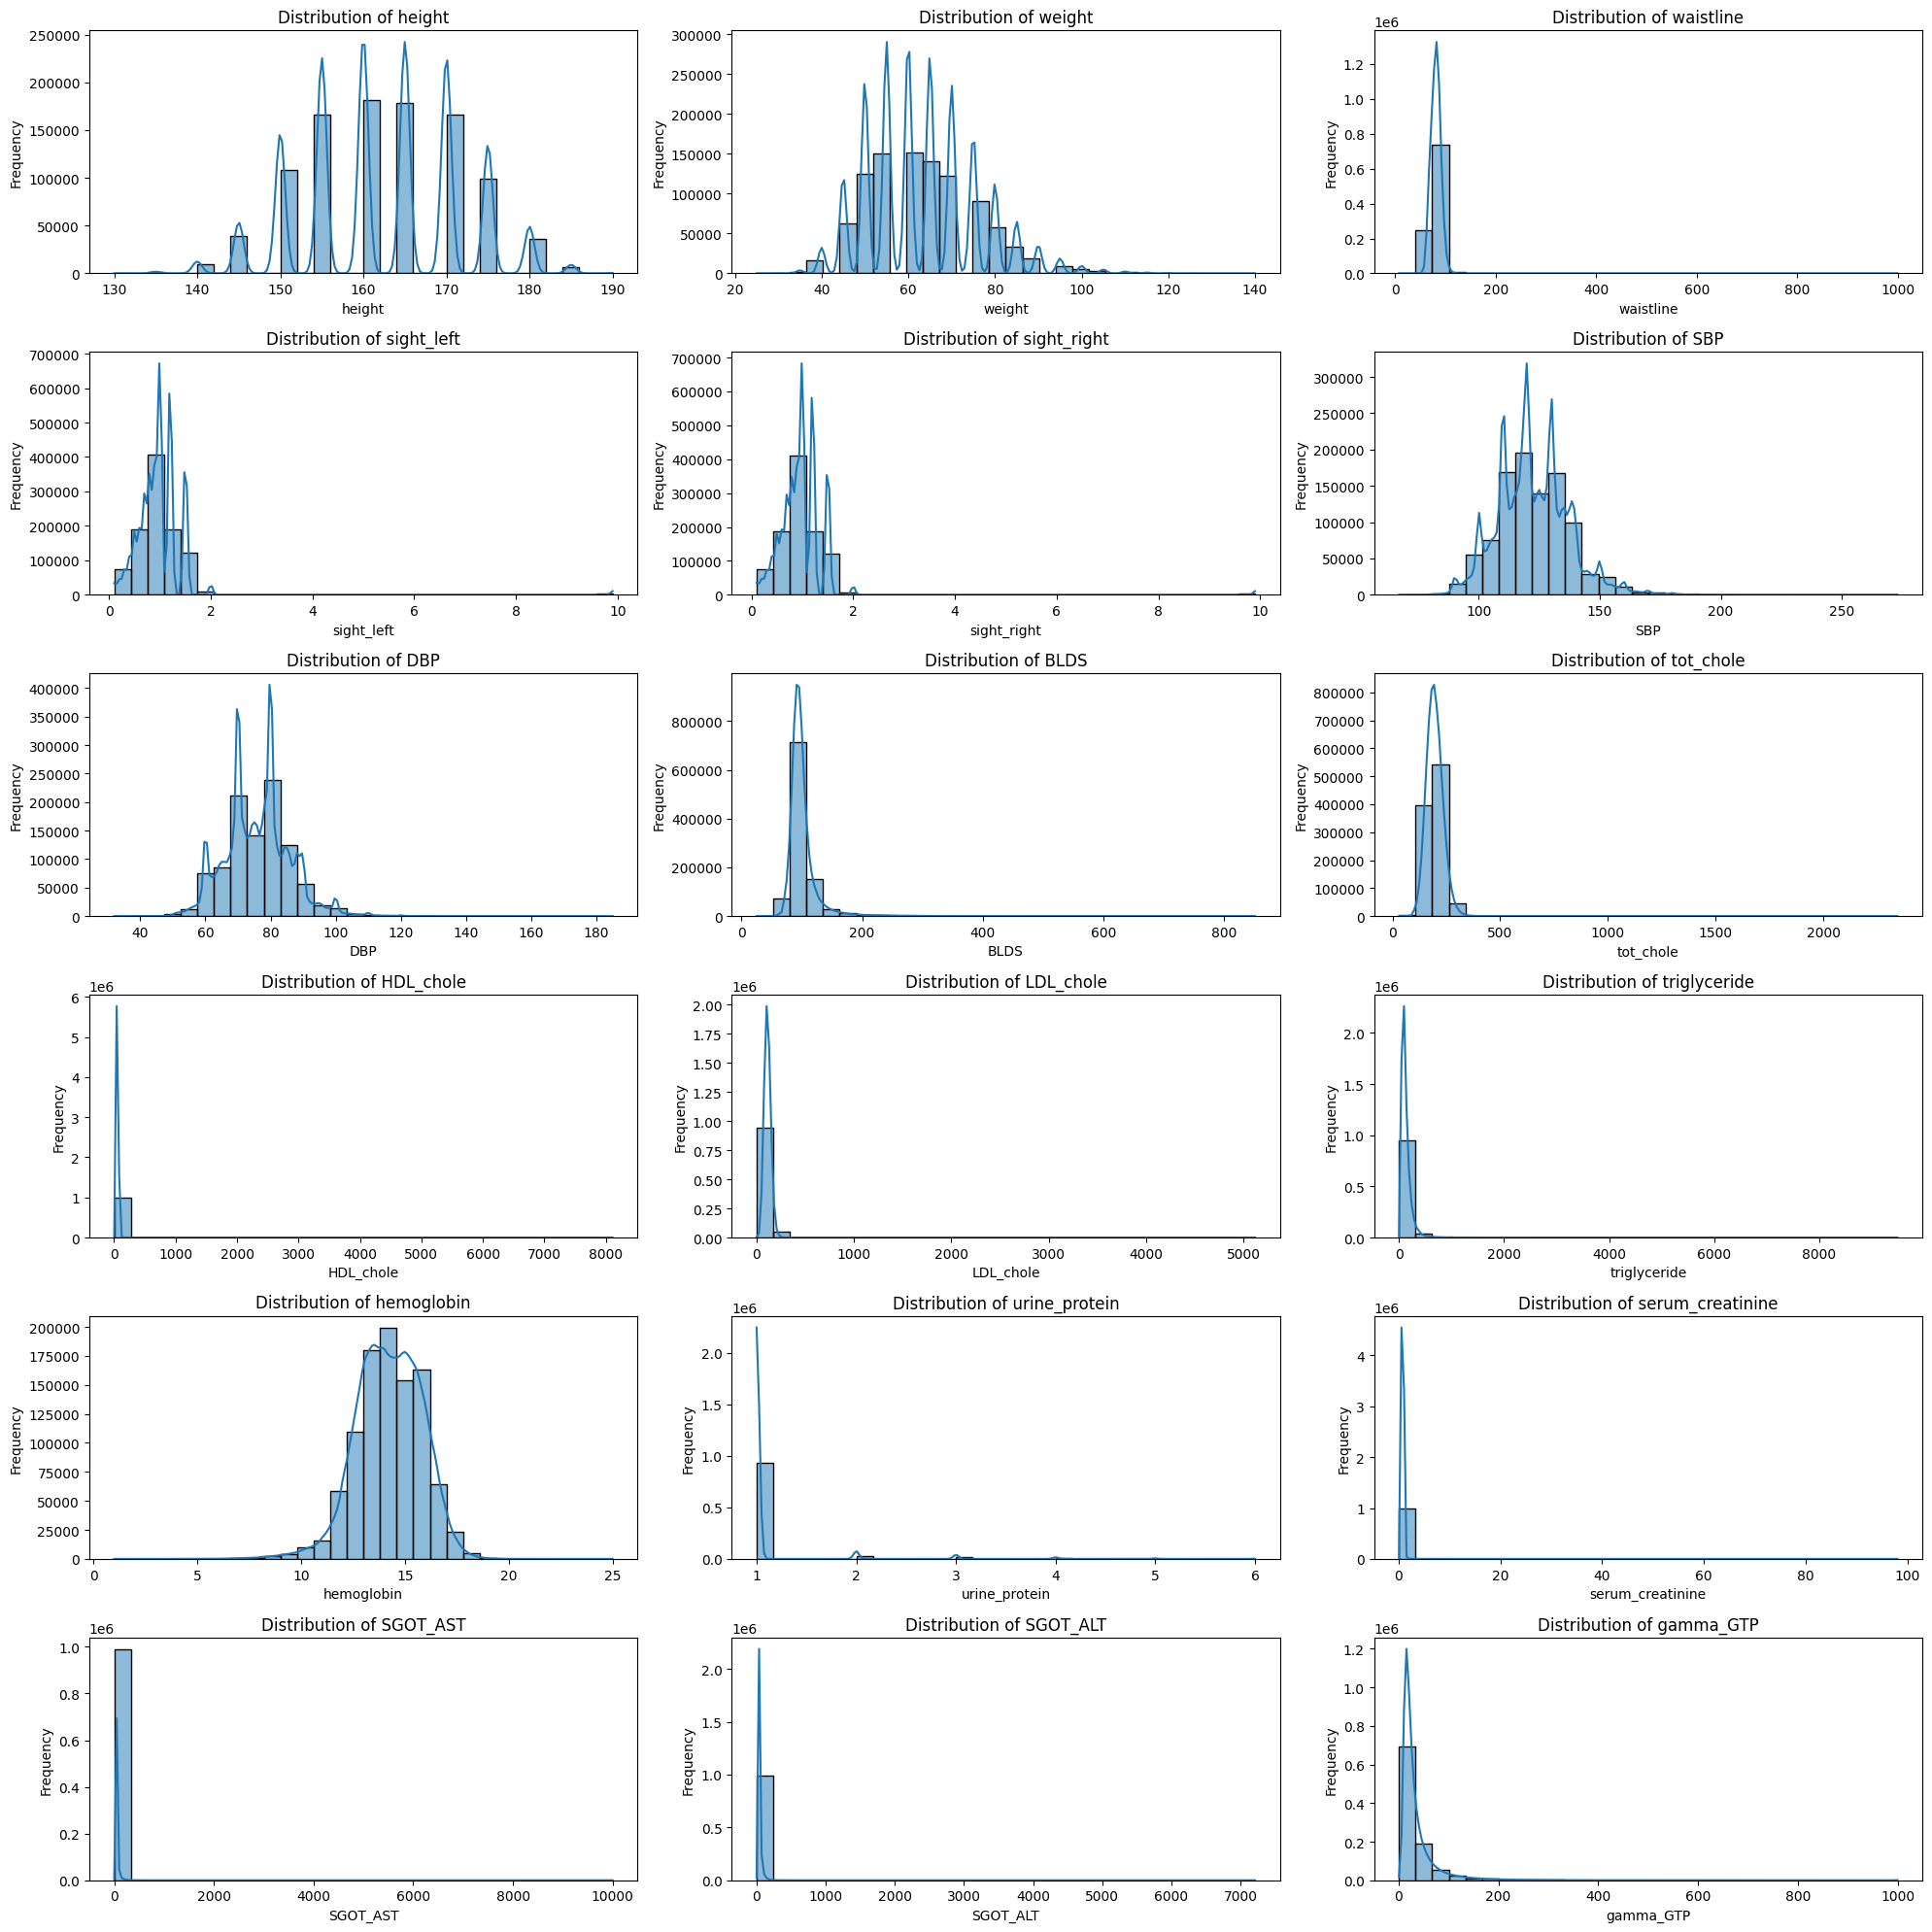

In [ ]:
# Plotting the distribution for the remaining columns
numeric_columns = [
    'height', 'weight', 'waistline', 'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
    'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
    'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

plt.figure(figsize=(20, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution of the columns with numeric values
1. Height:

- Distribution: Appears to be fairly symmetric with a slight peak.
- Outliers: Minimal extreme values.
- Handling Method: Outliers are not significant; no transformation is likely needed.
2. Weight:

- Distribution: Right-skewed with a long tail towards higher values.
- Outliers: Noticeable at the higher end.
- Handling Method: Logarithmic or square root transformation can help reduce the skewness and impact of high-weight outliers.
3. Waistline:

- Distribution: Right-skewed similar to weight.
- Outliers: Prominent at the higher end.
- Handling Method: Logarithmic or square root transformation would be suitable to handle these outliers.
4. Sight_Left:

- Distribution: These distributions are not typical; they show multiple peaks, which might be due to the way eyesight is measured and categorized.
- Outliers: Not clearly distinguishable due to the nature of the distribution.
- Handling Method: Given the categorical-like nature of the data, transformations might not be appropriate. Instead, consider binning or categorizing these variables.

5. Sight_Right:

- Distribution: These distributions are not typical; they show multiple peaks, which might be due to the way eyesight is measured and categorized.
- Outliers: Not clearly distinguishable due to the nature of the distribution.
- Handling Method: Given the categorical-like nature of the data, transformations might not be appropriate. Instead, consider binning or categorizing these variables.

6. SBP (Systolic Blood Pressure):

- Insight: The distribution appears roughly symmetric with a slight right skew. It shows a clear central tendency with some outliers towards the higher end.
- Outliers: Yes, particularly on the higher end.
- Handling Method: A square root transformation might be more appropriate than a logarithmic one, as it is milder and can effectively handle the slight skewness.
7. DBP (Diastolic Blood Pressure):

- Insight: This distribution also looks relatively symmetric, similar to SBP, but with a less pronounced skew. It shows a clear central tendency with some outliers on the higher end.
- Outliers: Few, if any, significant outliers are noticeable.
- Handling Method: Given its near-normal distribution, extensive transformation might not be necessary. If needed, consider mild transformations like square root or robust scaling methods.
8. BLDS (Fasting Blood Glucose Level):

- Insight: The distribution is right-skewed, with most values concentrated on the lower end and a tail extending towards higher values.
- Outliers: Yes, especially high fasting blood glucose levels.
- Handling Method: A logarithmic transformation would be effective to reduce skewness and the impact of these high-value outliers.
9. Tot_Chole (Total Cholesterol Level):

- Insight: The distribution shows a right skew, though not as pronounced as in some other variables. Most values cluster at the lower end with a tail of higher values.
- Outliers: Yes, there are outliers on the higher end of the spectrum.
- Handling Method: A logarithmic transformation could be suitable, but given the less extreme skew, a square root transformation might also be effective.
10. HDL_Chole (HDL Cholesterol Level):

- Insight: The distribution is right-skewed with most values concentrated at the lower end and a tail extending towards higher values.
- Outliers: Yes, particularly high HDL cholesterol levels.
- Handling Method: A logarithmic transformation could be effective to normalize this distribution and reduce the impact of high-value outliers.
11. LDL_Chole (LDL Cholesterol Level):

- Insight: This distribution is right-skewed, with a majority of values clustering at the lower end and a tail towards the higher end.
- Outliers: Yes, particularly high LDL cholesterol levels.
- Handling Method: A logarithmic transformation would be suitable to address the skewness and reduce the impact of outliers.
12. Triglyceride:

- Insight: The distribution is heavily right-skewed, with a majority of values clustered at the lower range and a long tail towards higher values.
- Outliers: Yes, particularly high triglyceride levels.
- Handling Method: A logarithmic transformation is highly recommended to reduce the skewness and the effect of outliers.
13. Hemoglobin:

- Insight: The distribution appears quite symmetric and normally distributed, with fewer apparent outliers compared to the others.
- Outliers: Few, if any, significant outliers are noticeable.
- Handling Method: Given its near-normal distribution, extensive transformation might not be necessary. If outliers are present, consider using robust scaling methods or mild transformations.

14. Protein (Protein):

- Insight: The distribution is right-skewed with most values concentrated at the lower end, indicating a majority of normal protein levels in urine.
- Outliers: Yes, particularly higher levels of urine protein.
- Handling Method: A logarithmic transformation would be effective to reduce skewness and the impact of high-value outliers.
15. Creatinine (Creatine):

- Insight: This distribution is right-skewed, with a concentration of values on the lower end and a tail extending towards higher values.
- Outliers: Yes, especially high serum creatinine levels.
- Handling Method: A logarithmic transformation is recommended to normalize the distribution and mitigate outlier influence.
16. SGOT_AST:

- Insight: Highly right-skewed distribution, indicating a concentration of lower values and a long tail of higher values.
- Outliers: Yes, with some extremely high values.
- Handling Method: A logarithmic transformation is suitable to address this skewness and reduce the impact of extreme outliers.
17. SGOT_ALT:

- Insight: Similar to SGOT_AST, this distribution is also highly right-skewed, indicating a concentration of lower values and a long tail of higher values.
- Outliers: Yes, with some extreme high values.
- Handling Method: Again, a logarithmic transformation is recommended to normalize the distribution and mitigate outlier influence.
18. Gamma_GTP (Gamma-Glutamyl Transpeptidase):

- Insight: The distribution is highly right-skewed, similar to SGOT_AST and SGOT_ALT, with a majority of lower values and a long tail of higher values.
- Outliers: Yes, with some very high values.
- Handling Method: A logarithmic transformation is highly recommended to reduce skewness and the effect of outliers.


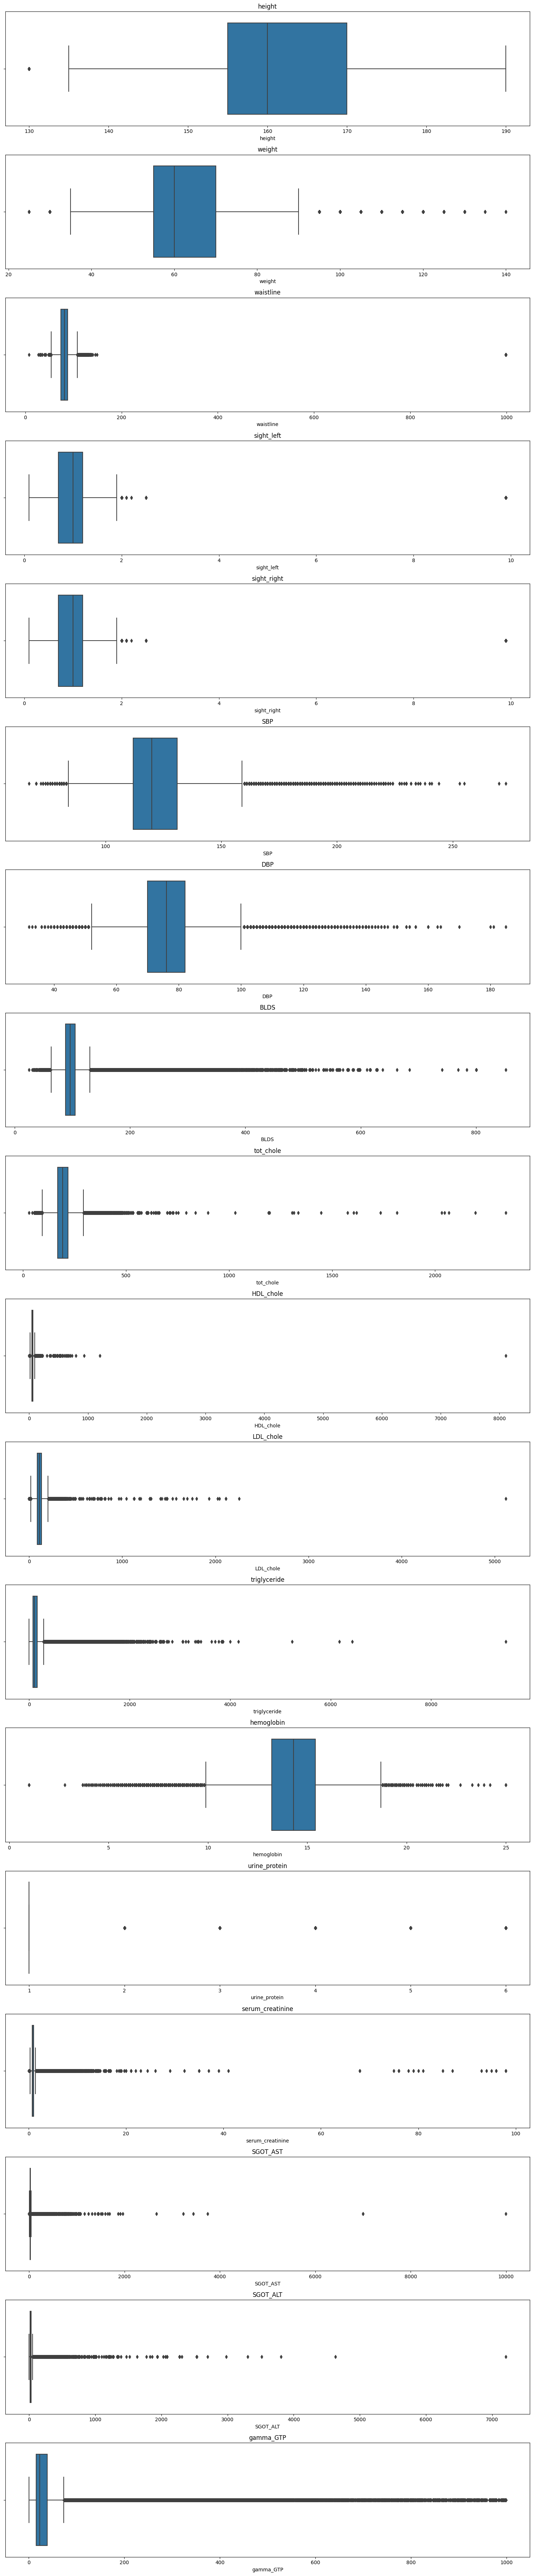

In [ ]:
# Selecting numerical columns for the box plot, excluding 'sex', 'hear_left', 'hear_right', and target variables
excluded_columns = ['sex', 'hear_left', 'hear_right', 'SMK_stat_type_cd', 'DRK_YN']
selected_columns = [col for col in numeric_columns if col not in excluded_columns]

# Generating separate box plots for the selected numerical columns
num_selected_columns = len(selected_columns)
plt.figure(figsize=(15, 4 * num_selected_columns))

for i, col in enumerate(selected_columns):
    plt.subplot(num_selected_columns, 1, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Conclusion:
1. No Transformation Needed:

- Height, DBP (Diastolic Blood Pressure), Hemoglobin, Sight_Left, Sight_Right:
  - These variables showed relatively symmetric distributions with fewer apparent outliers, so no transformation seems necessary.

2. Logarithmic Transformation:

- BLDS (Fasting Blood Glucose Level), HDL_Chole (HDL Cholesterol Level), LDL_Chole (LDL Cholesterol Level), Triglyceride, Urine_Protein, Serum_Creatinine, SGOT_AST, SGOT_ALT, Gamma_GTP:
  - These variables exhibited significant right-skewness and had outliers predominantly on the higher end. A logarithmic transformation is suitable to reduce skewness and the impact of outliers.
3. Both Logarithmic and Square Root Transformation:

- Weight, Waistline, Tot_Chole (Total Cholesterol Level):
  - For these variables, the choice between logarithmic and square root transformation could be based on the extent of skewness. Logarithmic transformation is more effective for highly skewed data, while square root transformation is milder and suitable for moderately skewed data.
  - We decide to apply square root transformation for these columns.
4. Square Root Transformation:

- SBP (Systolic Blood Pressure):
  - Given its slightly right-skewed distribution, a square root transformation can be effective. It's a milder transformation compared to logarithmic and can adequately handle the slight skewness.

In [ ]:
# Columns to apply logarithmic transformation
log_transform_columns = ["BLDS", "HDL_chole", "LDL_chole", "triglyceride",
                         "urine_protein", "serum_creatinine", "SGOT_AST", "SGOT_ALT", "gamma_GTP"]

# Applying logarithmic transformation
for column in log_transform_columns:
    data[f"log_{column}"] = np.log(data[column])

# Columns to apply square root transformation
sqrt_transform_columns = ["weight", "waistline", "tot_chole", "SBP"]

# Applying square root transformation
for column in sqrt_transform_columns:
    data[f"sqrt_{column}"] = np.sqrt(data[column])

# Dropping previous transformed columns if they exist
data = data.drop(columns=[f"log_{col}" for col in log_transform_columns] + [f"sqrt_{col}" for col in sqrt_transform_columns], errors='ignore')

data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  

[5 rows x 24 columns]

## Encoding the categorical variables
-  "Sex" column:
  - 0 to 'Male'
  - 1 to 'Female'
- "DRK_YN" column:
  - 0 to 'N' (Non-Drinker)
  - 1 to 'Y' (Drinker)

In [ ]:
# Create a copy of the dataset to avoid modifying the original one
data_encoded = data.copy()

# Initialize label encoders
label_encoder_sex = LabelEncoder()
label_encoder_drk = LabelEncoder()

# Apply label encoding to the 'sex' and 'DRK_YN' columns
data_encoded['sex'] = label_encoder_sex.fit_transform(data_encoded['sex'])
data_encoded['DRK_YN'] = label_encoder_drk.fit_transform(data_encoded['DRK_YN'])

# Display the first few rows of the transformed dataset
data_encoded

sex  age  height  weight  waistline  sight_left  sight_right  \
0         1   35     170      75       90.0         1.0          1.0   
1         1   30     180      80       89.0         0.9          1.2   
2         1   40     165      75       91.0         1.2          1.5   
3         1   50     175      80       91.0         1.5          1.2   
4         1   50     165      60       80.0         1.0          1.2   
...     ...  ...     ...     ...        ...         ...          ...   
991341    1   45     175      80       92.1         1.5          1.5   
991342    1   35     170      75       86.0         1.0          1.5   
991343    0   40     155      50       68.0         1.0          0.7   
991344    1   25     175      60       72.0         1.5          1.0   
991345    1   50     160      70       90.5         1.0          1.5   

        hear_left  hear_right    SBP  ...  LDL_chole  triglyceride  \
0             1.0         1.0  120.0  ...      126.0          92.0   
1             1.0         1.0  130.0  ...      148.0         121.0   
2             1.0         1.0  120.0  ...       74.0         104.0   
3             1.0         1.0  145.0  ...      104.0         106.0   
4             1.0         1.0  138.0  ...      117.0         104.0   
...           ...         ...    ...  ...        ...           ...   
991341        1.0         1.0  114.0  ...      125.0         132.0   
991342        1.0         1.0  119.0  ...       84.0          45.0   
991343        1.0         1.0  110.0  ...       77.0         157.0   
991344        1.0         1.0  119.0  ...       73.0          53.0   
991345        1.0         1.0  133.0  ...      153.0         163.0   

        hemoglobin  urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  \
0             17.1            1.0               1.0      21.0      35.0   
1             15.8            1.0               0.9      20.0      36.0   
2             15.8            1.0               0.9      47.0      32.0   
3             17.6            1.0               1.1      29.0      34.0   
4             13.8            1.0               0.8      19.0      12.0   
...            ...            ...               ...       ...       ...   
991341        15.0            1.0               1.0      26.0      36.0   
991342        15.8            1.0               1.1      14.0      17.0   
991343        14.3            1.0               0.8      30.0      27.0   
991344        14.5            1.0               0.8      21.0      14.0   
991345        15.8            1.0               0.9      24.0      43.0   

        gamma_GTP  SMK_stat_type_cd  DRK_YN  
0            40.0               1.0       1  
1            27.0               3.0       0  
2            68.0               1.0       0  
3            18.0               1.0       0  
4            25.0               1.0       0  
...           ...               ...     ...  
991341       27.0               1.0       0  
991342       15.0               1.0       0  
991343       17.0               3.0       1  
991344       17.0               1.0       0  
991345       36.0               3.0       1  

[991346 rows x 24 columns]

- The distribution of the target variables

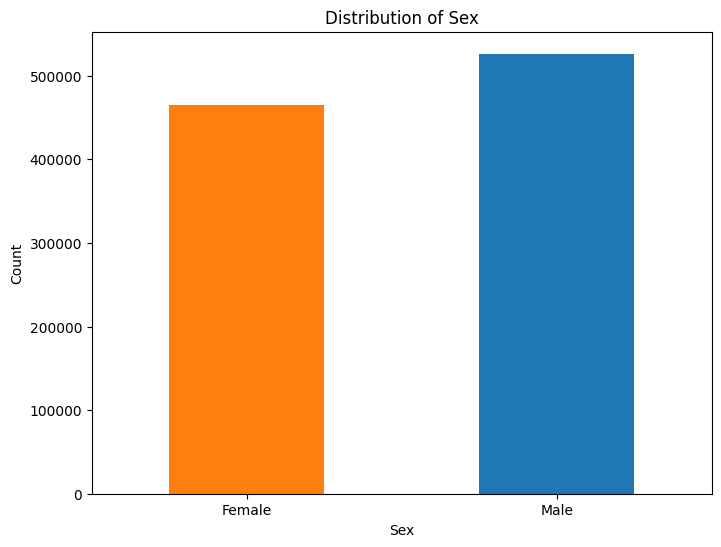

In [ ]:
sex_distribution = data_encoded['sex'].value_counts().sort_index()

colors = ['#ff7f0e', '#1f77b4']

plt.figure(figsize=(8, 6))
sex_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()

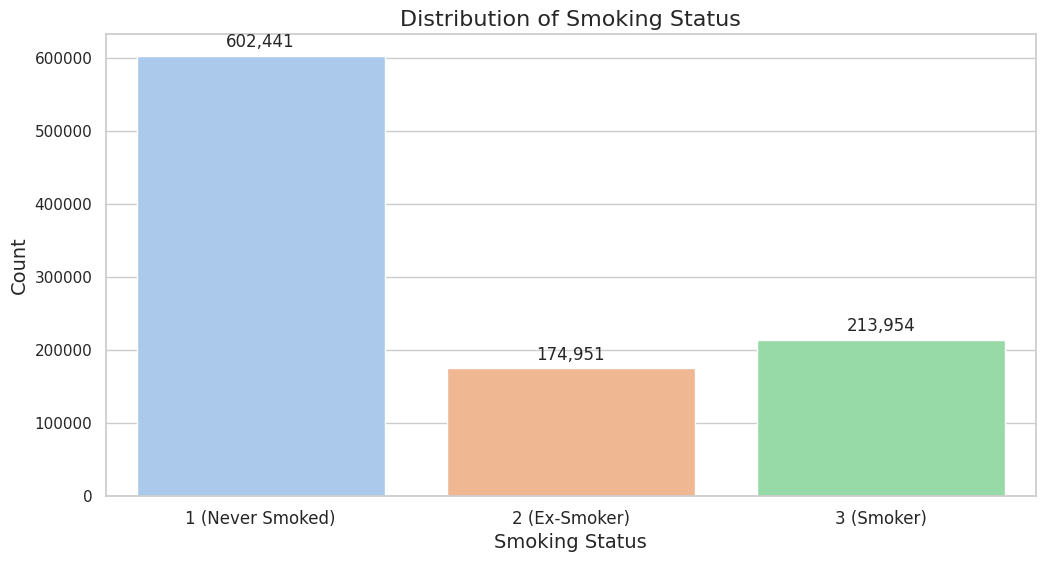

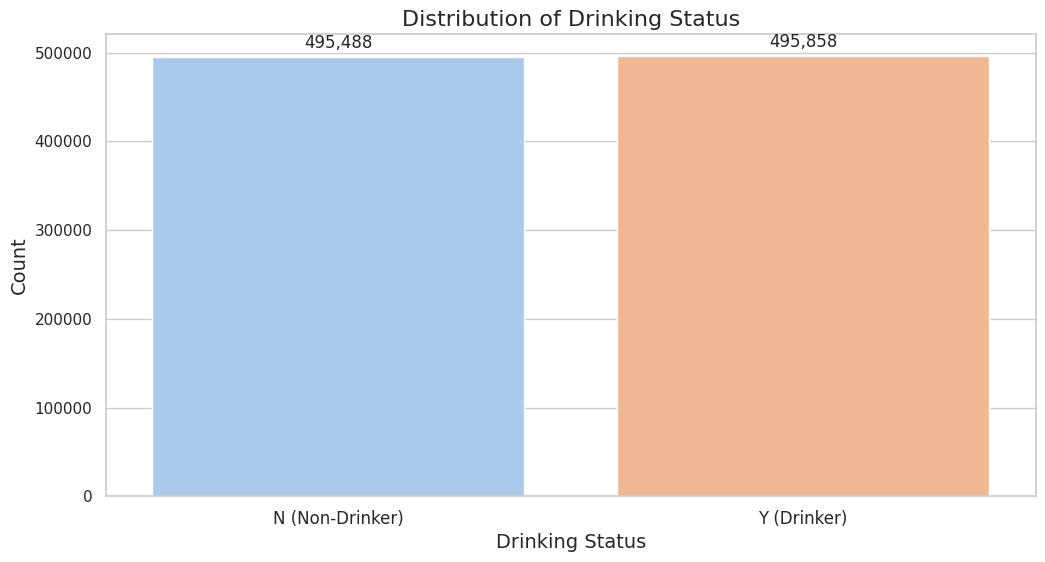

In [ ]:
# Setting a larger plot style
sns.set(style="whitegrid", palette="pastel")

# Plotting the distribution of SMK_stat_type_cd
plt.figure(figsize=(12, 6))
smoking_plot = sns.countplot(x='SMK_stat_type_cd', data=data)
smoking_plot.set_title('Distribution of Smoking Status', fontsize=16)
smoking_plot.set_xlabel('Smoking Status', fontsize=14)
smoking_plot.set_ylabel('Count', fontsize=14)
smoking_plot.set_xticklabels(['1 (Never Smoked)', '2 (Ex-Smoker)', '3 (Smoker)'], fontsize=12)
for p in smoking_plot.patches:
    smoking_plot.annotate(f'{int(p.get_height()):,}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 10),
                          textcoords='offset points')
plt.show()

# Plotting the distribution of DRK_YN
plt.figure(figsize=(12, 6))
drinking_plot = sns.countplot(x='DRK_YN', data=data)
drinking_plot.set_title('Distribution of Drinking Status', fontsize=16)
drinking_plot.set_xlabel('Drinking Status', fontsize=14)
drinking_plot.set_ylabel('Count', fontsize=14)
drinking_plot.set_xticklabels(['N (Non-Drinker)', 'Y (Drinker)'], fontsize=12)
for p in drinking_plot.patches:
    drinking_plot.annotate(f'{int(p.get_height()):,}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           xytext=(0, 10),
                           textcoords='offset points')
plt.show()


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  int64  
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
# Dataset with SMK_stat_type_cd as the target variable
smk_data = data_encoded.drop(columns=['DRK_YN'])
smk_data.rename(columns={'SMK_stat_type_cd': 'smk_target'}, inplace=True)

smk_data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0         1.0  120.0  ...       48.0      126.0          92.0        17.1   
1         1.0  130.0  ...       55.0      148.0         121.0        15.8   
2         1.0  120.0  ...       41.0       74.0         104.0        15.8   
3         1.0  145.0  ...       76.0      104.0         106.0        17.6   
4         1.0  138.0  ...       61.0      117.0         104.0        13.8   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  smk_target  
0            1.0               1.0      21.0      35.0       40.0         1.0  
1            1.0               0.9      20.0      36.0       27.0         3.0  
2            1.0               0.9      47.0      32.0       68.0         1.0  
3            1.0               1.1      29.0      34.0       18.0         1.0  
4            1.0               0.8      19.0      12.0       25.0         1.0  

[5 rows x 23 columns]

In [ ]:
# Dataset with DRK_YN as the target variable
drk_data = data_encoded.drop(columns=['SMK_stat_type_cd'])
drk_data.rename(columns={'DRK_YN': 'drk_target'}, inplace=True)

drk_data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0         1.0  120.0  ...       48.0      126.0          92.0        17.1   
1         1.0  130.0  ...       55.0      148.0         121.0        15.8   
2         1.0  120.0  ...       41.0       74.0         104.0        15.8   
3         1.0  145.0  ...       76.0      104.0         106.0        17.6   
4         1.0  138.0  ...       61.0      117.0         104.0        13.8   

   urine_protein  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  drk_target  
0            1.0               1.0      21.0      35.0       40.0           1  
1            1.0               0.9      20.0      36.0       27.0           0  
2            1.0               0.9      47.0      32.0       68.0           0  
3            1.0               1.1      29.0      34.0       18.0           0  
4            1.0               0.8      19.0      12.0       25.0           0  

[5 rows x 23 columns]

## Feature Extraction for smk_data, drk_data, and smote_smk_data

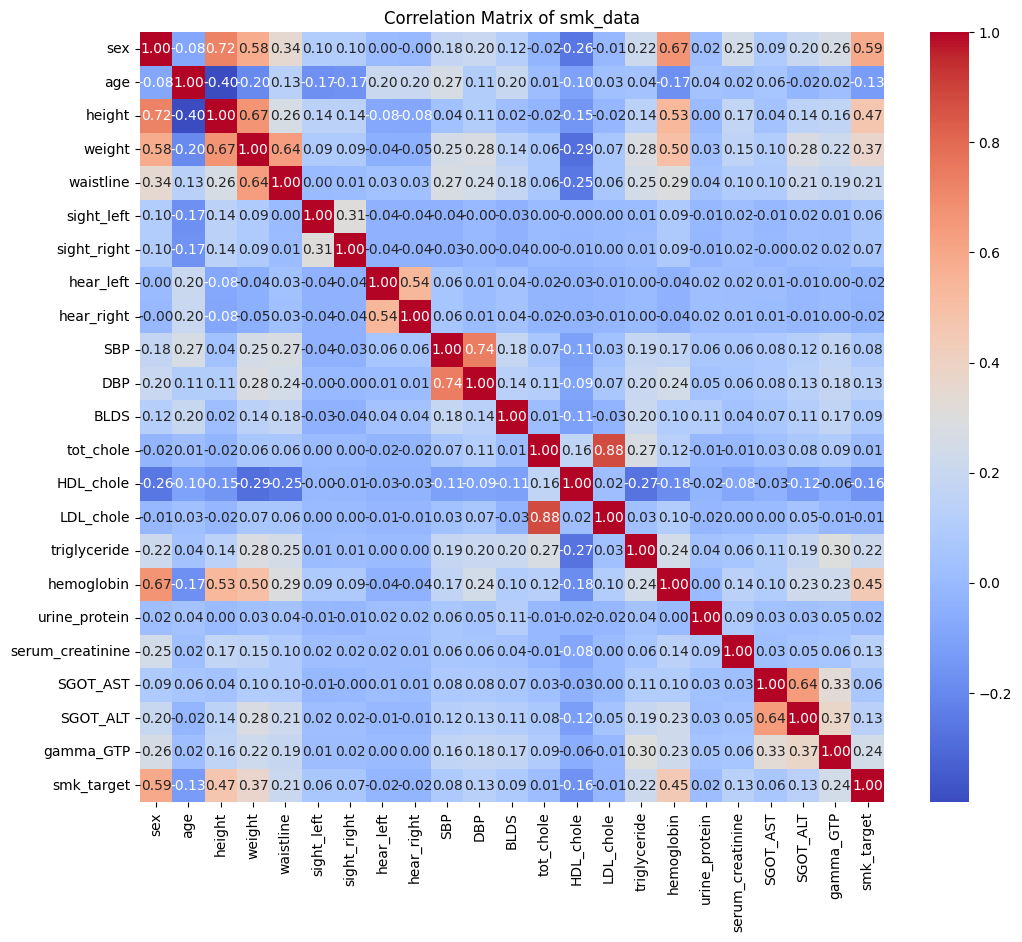

In [ ]:
# Calculate the correlation matrix
correlation_matrix_smk = smk_data.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_smk, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of smk_data")
plt.show()

In [ ]:
# Identify features highly correlated with the target (assuming target is numeric)
target_correlation_smk = correlation_matrix_smk['smk_target'].abs().sort_values(ascending=False)
highly_correlated_features_smk = target_correlation_smk[1:]  # Exclude the target itself

# Select a threshold for correlation strength
correlation_threshold = 0.08
selected_features_smk = highly_correlated_features_smk[highly_correlated_features_smk >= correlation_threshold].index.tolist()

# Print the selected features
print("Selected features based on correlation:")
print(selected_features_smk)

Selected features based on correlation:
['sex', 'height', 'hemoglobin', 'weight', 'gamma_GTP', 'triglyceride', 'waistline', 'HDL_chole', 'SGOT_ALT', 'serum_creatinine', 'DBP', 'age', 'BLDS', 'SBP']


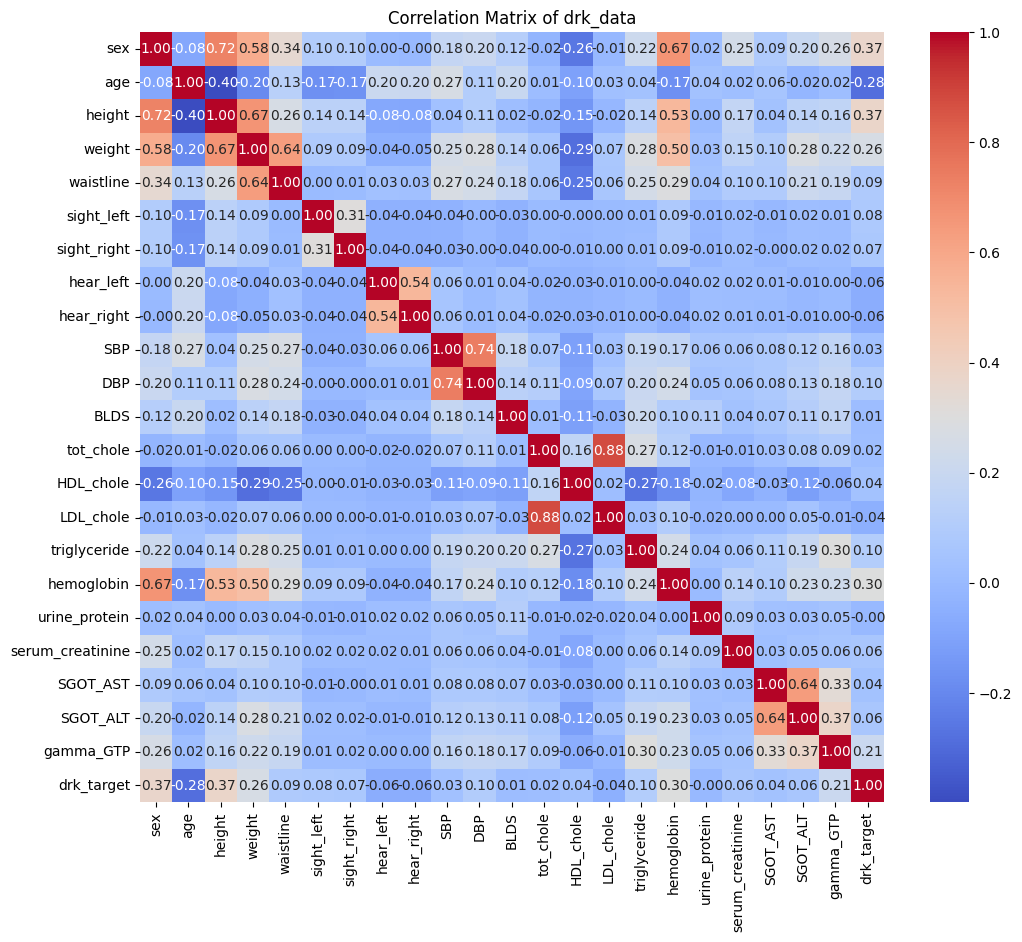

In [ ]:
# Calculate the correlation matrix
correlation_matrix_drk = drk_data.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_drk, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of drk_data")
plt.show()

In [ ]:
# Identify features highly correlated with the target (assuming target is numeric)
target_correlation_drk = correlation_matrix_drk['drk_target'].abs().sort_values(ascending=False)
highly_correlated_features_drk = target_correlation_drk[1:]  # Exclude the target itself

# Select a threshold for correlation strength
correlation_threshold = 0.06
selected_features_drk = highly_correlated_features_drk[highly_correlated_features_drk >= correlation_threshold].index.tolist()

# Print the selected features
print("Selected features based on correlation:")
print(selected_features_drk)

Selected features based on correlation:
['height', 'sex', 'hemoglobin', 'age', 'weight', 'gamma_GTP', 'triglyceride', 'DBP', 'waistline', 'sight_left', 'sight_right', 'SGOT_ALT', 'serum_creatinine']


In [ ]:
# Create a new dataset with selected features
smk_data_selected = smk_data[selected_features_smk + ['smk_target']]

# Display the first few rows of the new dataset
smk_data_selected

sex  height  hemoglobin  weight  gamma_GTP  triglyceride  waistline  \
0         1     170        17.1      75       40.0          92.0       90.0   
1         1     180        15.8      80       27.0         121.0       89.0   
2         1     165        15.8      75       68.0         104.0       91.0   
3         1     175        17.6      80       18.0         106.0       91.0   
4         1     165        13.8      60       25.0         104.0       80.0   
...     ...     ...         ...     ...        ...           ...        ...   
991341    1     175        15.0      80       27.0         132.0       92.1   
991342    1     170        15.8      75       15.0          45.0       86.0   
991343    0     155        14.3      50       17.0         157.0       68.0   
991344    1     175        14.5      60       17.0          53.0       72.0   
991345    1     160        15.8      70       36.0         163.0       90.5   

        HDL_chole  SGOT_ALT  serum_creatinine   DBP  age   BLDS    SBP  \
0            48.0      35.0               1.0  80.0   35   99.0  120.0   
1            55.0      36.0               0.9  82.0   30  106.0  130.0   
2            41.0      32.0               0.9  70.0   40   98.0  120.0   
3            76.0      34.0               1.1  87.0   50   95.0  145.0   
4            61.0      12.0               0.8  82.0   50  101.0  138.0   
...           ...       ...               ...   ...  ...    ...    ...   
991341       46.0      36.0               1.0  80.0   45   88.0  114.0   
991342       40.0      17.0               1.1  83.0   35   83.0  119.0   
991343       96.0      27.0               0.8  70.0   40   90.0  110.0   
991344       38.0      14.0               0.8  74.0   25   69.0  119.0   
991345       39.0      43.0               0.9  79.0   50   99.0  133.0   

        smk_target  
0              1.0  
1              3.0  
2              1.0  
3              1.0  
4              1.0  
...            ...  
991341         1.0  
991342         1.0  
991343         3.0  
991344         1.0  
991345         3.0  

[991346 rows x 15 columns]

In [ ]:
# Create a new dataset with selected features
drk_data_selected = drk_data[selected_features_drk + ['drk_target']]

# Display the first few rows of the new dataset
drk_data_selected

height  sex  hemoglobin  age  weight  gamma_GTP  triglyceride   DBP  \
0          170    1        17.1   35      75       40.0          92.0  80.0   
1          180    1        15.8   30      80       27.0         121.0  82.0   
2          165    1        15.8   40      75       68.0         104.0  70.0   
3          175    1        17.6   50      80       18.0         106.0  87.0   
4          165    1        13.8   50      60       25.0         104.0  82.0   
...        ...  ...         ...  ...     ...        ...           ...   ...   
991341     175    1        15.0   45      80       27.0         132.0  80.0   
991342     170    1        15.8   35      75       15.0          45.0  83.0   
991343     155    0        14.3   40      50       17.0         157.0  70.0   
991344     175    1        14.5   25      60       17.0          53.0  74.0   
991345     160    1        15.8   50      70       36.0         163.0  79.0   

        waistline  sight_left  sight_right  SGOT_ALT  serum_creatinine  \
0            90.0         1.0          1.0      35.0               1.0   
1            89.0         0.9          1.2      36.0               0.9   
2            91.0         1.2          1.5      32.0               0.9   
3            91.0         1.5          1.2      34.0               1.1   
4            80.0         1.0          1.2      12.0               0.8   
...           ...         ...          ...       ...               ...   
991341       92.1         1.5          1.5      36.0               1.0   
991342       86.0         1.0          1.5      17.0               1.1   
991343       68.0         1.0          0.7      27.0               0.8   
991344       72.0         1.5          1.0      14.0               0.8   
991345       90.5         1.0          1.5      43.0               0.9   

        drk_target  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
991341           0  
991342           0  
991343           1  
991344           0  
991345           1  

[991346 rows x 14 columns]

# Splitting the data set into train/val/test
- Train : Validation : Test = 60 : 20 : 20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separate the features and the target variable
X_smk = smk_data_selected.drop(columns=['smk_target'])
y_smk = smk_data_selected['smk_target']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train_smk, X_temp_smk, y_train_smk, y_temp_smk = train_test_split(X_smk, y_smk, test_size=0.4, random_state=42)
X_val_smk, X_test_smk, y_val_smk, y_test_smk = train_test_split(X_temp_smk, y_temp_smk, test_size=0.5, random_state=42)

print("Training set:", X_train_smk.shape, y_train_smk.shape)
print("Validation set:", X_val_smk.shape, y_val_smk.shape)
print("Test set:", X_test_smk.shape, y_test_smk.shape)

Training set: (594807, 14) (594807,)
Validation set: (198269, 14) (198269,)
Test set: (198270, 14) (198270,)


In [ ]:
# Separate the features and the target variable
X_drk = drk_data_selected.drop(columns=['drk_target'])
y_drk = drk_data_selected['drk_target']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train_drk, X_temp_drk, y_train_drk, y_temp_drk = train_test_split(X_drk, y_drk, test_size=0.4, random_state=42)
X_val_drk, X_test_drk, y_val_drk, y_test_drk = train_test_split(X_temp_drk, y_temp_drk, test_size=0.5, random_state=42)

print("Training set:", X_train_drk.shape, y_train_drk.shape)
print("Validation set:", X_val_drk.shape, y_val_drk.shape)
print("Test set:", X_test_drk.shape, y_test_drk.shape)

Training set: (594807, 13) (594807,)
Validation set: (198269, 13) (198269,)
Test set: (198270, 13) (198270,)


## Using SMOTE to handle the Imablance in the 'SMK_stat_type_cd'

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_smk, y_train_smk)

print("Training set:", X_train_smote.shape, y_train_smote.shape)
print("Validation set:", X_val_smk.shape, y_val_smk.shape)
print("Test set:", X_test_smk.shape, y_test_smk.shape)

Training set: (1084254, 14) (1084254,)
Validation set: (198269, 14) (198269,)
Test set: (198270, 14) (198270,)


In [ ]:
# Before SMOTE
print("Class distribution before SMOTE:\n", y_train_smk.value_counts())
print("\n")
# After SMOTE
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

Class distribution before SMOTE:
 1.0    361418
3.0    128143
2.0    105246
Name: smk_target, dtype: int64


Class distribution after SMOTE:
 3.0    361418
1.0    361418
2.0    361418
Name: smk_target, dtype: int64


# Baseline Model using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Create Logistic Regression models
baseline_model_smk = LogisticRegression(multi_class='multinomial', max_iter=100)
baseline_model_drk = LogisticRegression()
baseline_model_smote = LogisticRegression(multi_class='multinomial', max_iter=100)

# Train the models on the training data
baseline_model_smk.fit(X_train_smk, y_train_smk)
baseline_model_drk.fit(X_train_drk, y_train_drk)
baseline_model_smote.fit(X_train_smote, y_train_smote)

# Predictions on the validation set
y_pred_val_lr_smk = baseline_model_smk.predict(X_val_smk)
y_pred_val_lr_drk = baseline_model_drk.predict(X_val_drk)
y_pred_val_lr_smote = baseline_model_smote.predict(X_val_smk)

# Evaluate the model for the smoking dataset
accuracy_smk = accuracy_score(y_val_smk, y_pred_val_lr_smk)
precision_smk = precision_score(y_val_smk, y_pred_val_lr_smk, average='weighted')  # Use 'weighted' for multi-class
recall_smk = recall_score(y_val_smk, y_pred_val_lr_smk, average='weighted')  # Use 'weighted' for multi-class
f1_smk = f1_score(y_val_smk, y_pred_val_lr_smk, average='weighted')  # Use 'weighted' for multi-class
roc_auc_smk = roc_auc_score(y_val_smk, baseline_model_smk.predict_proba(X_val_smk), multi_class='ovr')  # Use 'ovr' for multi-class

# Confusion matrix for smoking dataset
confusion_matrix_smk = confusion_matrix(y_val_smk, y_pred_val_lr_smk)

# Evaluate the model for the drinking dataset
accuracy_drk = accuracy_score(y_val_drk, y_pred_val_lr_drk)
precision_drk = precision_score(y_val_drk, y_pred_val_lr_drk)
recall_drk = recall_score(y_val_drk, y_pred_val_lr_drk)
f1_drk = f1_score(y_val_drk, y_pred_val_lr_drk)
roc_auc_drk = roc_auc_score(y_val_drk, baseline_model_drk.predict_proba(X_val_drk)[:, 1])  # For binary classification

# Confusion matrix for drinking dataset
confusion_matrix_drk = confusion_matrix(y_val_drk, y_pred_val_lr_drk)

# Evaluate the model for the smoking dataset
accuracy_smote = accuracy_score(y_val_smk, y_pred_val_lr_smote)
precision_smote = precision_score(y_val_smk, y_pred_val_lr_smote, average='weighted')  # Use 'weighted' for multi-class
recall_smote = recall_score(y_val_smk, y_pred_val_lr_smote, average='weighted')  # Use 'weighted' for multi-class
f1_smote = f1_score(y_val_smk, y_pred_val_lr_smote, average='weighted')  # Use 'weighted' for multi-class
roc_auc_smote = roc_auc_score(y_pred_val_lr_smote, baseline_model_smk.predict_proba(X_val_smk), multi_class='ovr')  # Use 'ovr' for multi-class

# Confusion matrix for SMOTE dataset
confusion_matrix_smote = confusion_matrix(y_val_smk, y_pred_val_lr_smote)


# Print the evaluation metrics for the smoking dataset
print("\n----- Logistic Regression of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}")
print(f"Precision: {precision_smk:.4f}")
print(f"Recall: {recall_smk:.4f}")
print(f"F1 Score: {f1_smk:.4f}")
print(f"ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

# Print the evaluation metrics for the drinking dataset
print("\n----- Logistic Regression of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}")
print(f"Precision: {precision_drk:.4f}")
print(f"Recall: {recall_drk:.4f}")
print(f"F1 Score: {f1_drk:.4f}")
print(f"ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

# Print the evaluation metrics for the SMOTE dataset
print("\n----- Logistic Regression of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")
print(f"F1 Score: {f1_smote:.4f}")
print(f"ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


----- Logistic Regression of Smoking data -----
Accuracy: 0.6468
Precision: 0.5963
Recall: 0.6468
F1 Score: 0.6006
ROC AUC: 0.7642
Confusion Matrix:
 [[108674   3750   8259]
 [ 23619   4347   6809]
 [ 23748   3843  15220]]

----- Logistic Regression of Drinking data -----
Accuracy: 0.7132
Precision: 0.7135
Recall: 0.7124
F1 Score: 0.7130
ROC AUC: 0.7826
Confusion Matrix:
 [[70757 28360]
 [28513 70639]]

----- Logistic Regression of SMOTE data -----
Accuracy: 0.5967
Precision: 0.6579
Recall: 0.5967
F1 Score: 0.6174
ROC AUC: 0.9435
Confusion Matrix:
 [[79259 23096 18328]
 [ 7924 16747 10104]
 [ 8009 12495 22307]]


# Application Machine Learning

# 1. CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 15.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb_smk = CatBoostClassifier(verbose=0, task_type='CPU', loss_function='MultiClass')
cb_drk = CatBoostClassifier(verbose=0, task_type='CPU', loss_function='Logloss')
cb_smote = CatBoostClassifier(verbose=0, task_type='CPU', loss_function='MultiClass')

cb_smk.fit(X_train_smk, y_train_smk)
cb_drk.fit(X_train_drk, y_train_drk)
cb_smote.fit(X_train_smote, y_train_smote)

y_pred_val_cb_smk = cb_smk.predict(X_val_smk)
y_pred_val_cb_drk = cb_drk.predict(X_val_drk)
y_pred_val_cb_smote = cb_smote.predict(X_val_smk)

In [ ]:
# Function to calculate metrics for multi-class classification
def evaluate_multi(y_true, y_pred, model, X):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, model.predict_proba(X), multi_class='ovr')
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, roc_auc, cm

# Function to calculate metrics for binary classification
def evaluate_bi(y_true, y_pred, model, X):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, model.predict_proba(X)[:, 1])  # For binary classification
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, roc_auc, cm

In [ ]:
# Evaluate the models
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_val_cb_smk, cb_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_val_cb_drk, cb_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_val_cb_smote, cb_smote, X_val_smk)

In [ ]:
# Print the evaluation metrics
print("\n----- CatBoost of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- CatBoost of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- CatBoost of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- CatBoost of Smoking data -----
Accuracy: 0.7008, Precision: 0.7064, Recall: 0.7008, F1 Score: 0.7029, ROC AUC: 0.8473
Confusion Matrix:
 [[99193 10065 11425]
 [ 8287 14365 12123]
 [ 9325  8092 25394]]

----- CatBoost of Drinking data -----
Accuracy: 0.7231, Precision: 0.7148, Recall: 0.7426, F1 Score: 0.7284, ROC AUC: 0.8020
Confusion Matrix:
 [[69738 29379]
 [25524 73628]]

----- CatBoost of SMOTE data -----
Accuracy: 0.6998, Precision: 0.7165, Recall: 0.6998, F1 Score: 0.7067, ROC AUC: 0.8467
Confusion Matrix:
 [[97119 11717 11847]
 [ 6697 16200 11878]
 [ 8052  9323 25436]]


## 2.  LightGBM

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm_smk = lgb.LGBMClassifier()
lgbm_drk = lgb.LGBMClassifier()
lgbm_smote = lgb.LGBMClassifier()

lgbm_smk.fit(X_train_smk, y_train_smk)
lgbm_drk.fit(X_train_drk, y_train_drk)
lgbm_smote.fit(X_train_smote, y_train_smote)

y_pred_val_lgbm_smk = lgbm_smk.predict(X_val_smk)
y_pred_val_lgbm_drk = lgbm_drk.predict(X_val_drk)
y_pred_val_lgbm_smote = lgbm_smote.predict(X_val_smk)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1919
[LightGBM] [Info] Number of data points in the train set: 594807, number of used features: 14
[LightGBM] [Info] Start training from score -0.498202
[LightGBM] [Info] Start training from score -1.731937
[LightGBM] [Info] Start training from score -1.535090
[LightGBM] [Info] Number of positive: 297548, number of negative: 297259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1433
[LightGBM] [Info] Number of data points in the train set: 594807, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500243 

In [ ]:
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_val_lgbm_smk, lgbm_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_val_lgbm_drk, lgbm_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_val_lgbm_smote, lgbm_smote, X_val_smk)

print("\n----- LightGBM of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- LightGBM of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- LightGBM of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- LightGBM of Smoking data -----
Accuracy: 0.7008, Precision: 0.7066, Recall: 0.7008, F1 Score: 0.7030, ROC AUC: 0.8470
Confusion Matrix:
 [[99132 10118 11433]
 [ 8228 14477 12070]
 [ 9355  8122 25334]]

----- LightGBM of Drinking data -----
Accuracy: 0.7243, Precision: 0.7150, Recall: 0.7462, F1 Score: 0.7302, ROC AUC: 0.8025
Confusion Matrix:
 [[69619 29498]
 [25165 73987]]

----- LightGBM of SMOTE data -----
Accuracy: 0.6981, Precision: 0.7187, Recall: 0.6981, F1 Score: 0.7065, ROC AUC: 0.8458
Confusion Matrix:
 [[96134 12278 12271]
 [ 6265 16607 11903]
 [ 7710  9424 25677]]


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_smk = KNeighborsClassifier(n_neighbors=5)
knn_drk = KNeighborsClassifier(n_neighbors=5)
knn_smote = KNeighborsClassifier(n_neighbors=5)

knn_smk.fit(X_train_smk, y_train_smk)
knn_drk.fit(X_train_drk, y_train_drk)
knn_smote.fit(X_train_smote, y_train_smote)

y_pred_val_knn_smk = knn_smk.predict(X_val_smk)
y_pred_val_knn_drk = knn_drk.predict(X_val_drk)
y_pred_val_knn_smote = knn_smote.predict(X_val_smk)

In [ ]:
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_val_knn_smk, knn_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_val_knn_drk, knn_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_val_knn_smote, knn_smote, X_val_smk)

# Print the evaluation metrics
print("\n----- KNN of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- KNN of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- KNN of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- KNN of Smoking data -----
Accuracy: 0.6330, Precision: 0.6013, Recall: 0.6330, F1 Score: 0.6106, ROC AUC: 0.7339
Confusion Matrix:
 [[94400  8648  7849]
 [16508  8945  6566]
 [18646  8629 11975]]

----- KNN of Drinking data -----
Accuracy: 0.6727, Precision: 0.6649, Recall: 0.6886, F1 Score: 0.6766, ROC AUC: 0.7260
Confusion Matrix:
 [[60165 31431]
 [28199 62371]]

----- KNN of SMOTE data -----
Accuracy: 0.5590, Precision: 0.6408, Recall: 0.5590, F1 Score: 0.5860, ROC AUC: 0.7005
Confusion Matrix:
 [[69475 22713 18709]
 [ 6255 14970 10794]
 [ 7079 14780 17391]]


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
nb_smk = MultinomialNB()
nb_drk = GaussianNB()
nb_smote = MultinomialNB()

nb_smk.fit(X_train_smk, y_train_smk)
nb_drk.fit(X_train_drk, y_train_drk)
nb_smote.fit(X_train_smote, y_train_smote)

y_pred_val_nb_smk = nb_smk.predict(X_val_smk)
y_pred_val_nb_drk = nb_drk.predict(X_val_drk)
y_pred_val_nb_smote = nb_smote.predict(X_val_smk)

In [ ]:
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_val_nb_smk, nb_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_val_nb_drk, nb_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_val_nb_smote, nb_smote, X_val_smk)

print("\n----- Naive Bayes of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Naive Bayes of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Naive Bayes of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Naive Bayes of Smoking data -----
Accuracy: 0.5951, Precision: 0.5699, Recall: 0.5951, F1 Score: 0.5798, ROC AUC: 0.6780
Confusion Matrix:
 [[86678  9075 15144]
 [16774  5492  9753]
 [17086  5921 16243]]

----- Naive Bayes of Drinking data -----
Accuracy: 0.6874, Precision: 0.7015, Recall: 0.6462, F1 Score: 0.6727, ROC AUC: 0.7427
Confusion Matrix:
 [[66687 24909]
 [32044 58526]]

----- Naive Bayes of SMOTE data -----
Accuracy: 0.5889, Precision: 0.5722, Recall: 0.5889, F1 Score: 0.5795, ROC AUC: 0.6771
Confusion Matrix:
 [[84813 11204 14880]
 [16055  6379  9585]
 [16178  6995 16077]]


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_smk = DecisionTreeClassifier()
dt_drk = DecisionTreeClassifier()
dt_smote = DecisionTreeClassifier()

dt_smk.fit(X_train_smk, y_train_smk)
dt_drk.fit(X_train_drk, y_train_drk)
dt_smote.fit(X_train_smote, y_train_smote)

y_pred_val_dt_smk = dt_smk.predict(X_val_smk)
y_pred_val_dt_drk = dt_drk.predict(X_val_drk)
y_pred_val_dt_smote = dt_smote.predict(X_val_smk)

In [ ]:
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_val_dt_smk, dt_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_val_dt_drk, dt_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_val_dt_smote, dt_smote, X_val_smk)

print("\n----- Decision Tree of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Decision Tree of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Decision Tree of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Decision Tree of Smoking data -----
Accuracy: 0.6187, Precision: 0.6225, Recall: 0.6187, F1 Score: 0.6206, ROC AUC: 0.6465
Confusion Matrix:
 [[85692 11897 13308]
 [11034 10843 10142]
 [12582 10499 16169]]

----- Decision Tree of Drinking data -----
Accuracy: 0.6265, Precision: 0.6232, Recall: 0.6293, F1 Score: 0.6262, ROC AUC: 0.6265
Confusion Matrix:
 [[57128 34468]
 [33570 57000]]

----- Decision Tree of SMOTE data -----
Accuracy: 0.6174, Precision: 0.6296, Recall: 0.6174, F1 Score: 0.6231, ROC AUC: 0.6523
Confusion Matrix:
 [[84244 12713 13940]
 [10018 11522 10479]
 [11582 10957 16711]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_smk = RandomForestClassifier()
rf_drk = RandomForestClassifier()
rf_smote = RandomForestClassifier()

rf_smk.fit(X_train_smk, y_train_smk)
rf_drk.fit(X_train_drk, y_train_drk)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_val_rf_smk = rf_smk.predict(X_val_smk)
y_pred_val_rf_drk = rf_drk.predict(X_val_drk)
y_pred_val_rf_smote = rf_smote.predict(X_val_smk)

In [ ]:
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_val_rf_smk, rf_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_val_rf_drk, rf_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_val_rf_smote, rf_smote, X_val_smk)

print("\n----- Random Forest of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Random Forest of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Random Forest of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Random Forest of Smoking data -----
Accuracy: 0.6918, Precision: 0.6914, Recall: 0.6918, F1 Score: 0.6910, ROC AUC: 0.8385
Confusion Matrix:
 [[91651  8855 10391]
 [ 8959 12038 11022]
 [ 9522  7402 22326]]

----- Random Forest of Drinking data -----
Accuracy: 0.7156, Precision: 0.7088, Recall: 0.7263, F1 Score: 0.7174, ROC AUC: 0.7918
Confusion Matrix:
 [[64576 27020]
 [24793 65777]]

----- Random Forest of SMOTE data -----
Accuracy: 0.6894, Precision: 0.7267, Recall: 0.6894, F1 Score: 0.7033, ROC AUC: 0.8376
Confusion Matrix:
 [[85655 12780 12462]
 [ 4291 16211 11517]
 [ 5432 10102 23716]]


# Hyperparameter Tuning

## 1. CatBoost after tuning

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}

catboost_smk = CatBoostClassifier(task_type='CPU', verbose=0, loss_function='MultiClass')
catboost_drk = CatBoostClassifier(task_type='CPU', verbose=0, loss_function='Logloss')
catboost_smote = CatBoostClassifier(task_type='CPU', verbose=0, loss_function='MultiClass')

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_smk = GridSearchCV(estimator=catboost_smk, param_grid=param_grid, cv=stratified_kfold, scoring='f1_weighted')
grid_drk = GridSearchCV(estimator=catboost_drk, param_grid=param_grid, cv=3, scoring='accuracy')
grid_smote = GridSearchCV(estimator=catboost_smote, param_grid=param_grid, cv=3, scoring='accuracy')

In [ ]:
grid_smk.fit(X_train_smk, y_train_smk)
print("Best parameters for smk_data:", grid_smk.best_params_)

grid_drk.fit(X_train_drk, y_train_drk)
print("Best parameters for drk_data:", grid_drk.best_params_)

grid_smote.fit(X_train_smote, y_train_smote)
print("Best parameters for smote_smk_data:", grid_smote.best_params_)

Best parameters for smk_data: {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}
Best parameters for drk_data: {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}
Best parameters for smote_smk_data: {'depth': 10, 'iterations': 30, 'learning_rate': 0.05}


In [ ]:
best_cb_smk = grid_smk.best_estimator_
best_cb_drk = grid_drk.best_estimator_
best_cb_smote = grid_smote.best_estimator_

y_pred_cb_tuned_smk = best_cb_smk.predict(X_val_smk)
y_pred_cb_tuned_drk = best_cb_drk.predict(X_val_drk)
y_pred_cb_tuned_smote = best_cb_smote.predict(X_val_smk)

accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_cb_tuned_smk, best_cb_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_cb_tuned_drk, best_cb_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_cb_tuned_smote, best_cb_smote, X_val_smk)

print("\n----- Tuned CatBoost of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Tuned CatBoost of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Tuned CatBoost of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Tuned CatBoost of Smoking data -----
Accuracy: 0.7005, Precision: 0.7065, Recall: 0.7005, F1 Score: 0.7027, ROC AUC: 0.8466
Confusion Matrix:
 [[91043  9350 10504]
 [ 7578 13202 11239]
 [ 8504  7375 23371]]

----- Tuned CatBoost of Drinking data -----
Accuracy: 0.7231, Precision: 0.7110, Recall: 0.7467, F1 Score: 0.7284, ROC AUC: 0.8021
Confusion Matrix:
 [[64104 27492]
 [22944 67626]]

----- Tuned CatBoost of SMOTE data -----
Accuracy: 0.6779, Precision: 0.7469, Recall: 0.6779, F1 Score: 0.6996, ROC AUC: 0.8377
Confusion Matrix:
 [[80811 14591 15495]
 [ 2057 18259 11703]
 [ 2950 11885 24415]]


In [ ]:
with open('best_cb_smk.pkl', 'wb') as file:
    pickle.dump(best_cb_smk, file)

with open('best_cb_drk.pkl', 'wb') as file:
    pickle.dump(best_cb_drk, file)

with open('best_cb_smote.pkl', 'wb') as file:
    pickle.dump(best_cb_smote, file)

## 2.  LightGBM after tuning

In [ ]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgbm_smk = lgb.LGBMClassifier()
lgbm_drk = lgb.LGBMClassifier()
lgbm_smote = lgb.LGBMClassifier()

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_smk = GridSearchCV(estimator=lgbm_smk, param_grid=param_grid, cv=stratified_kfold, scoring='f1_weighted')
grid_drk = GridSearchCV(estimator=lgbm_drk, param_grid=param_grid, cv=3, scoring='accuracy')
grid_smote = GridSearchCV(estimator=lgbm_smote, param_grid=param_grid, cv=3, scoring='accuracy')

In [ ]:
grid_smk.fit(X_train_smk, y_train_smk)
print("Best parameters for smk_data:", grid_smk.best_params_)

grid_drk.fit(X_train_drk, y_train_drk)
print("Best parameters for drk_data:", grid_drk.best_params_)

grid_smote.fit(X_train_smote, y_train_smote)
print("Best parameters for smote_smk_data:", grid_smote.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1913
[LightGBM] [Info] Number of data points in the train set: 396538, number of used features: 14
[LightGBM] [Info] Start training from score -0.498199
[LightGBM] [Info] Start training from score -1.731937
[LightGBM] [Info] Start training from score -1.535098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1921
[LightGBM] [Info] Number of data points in the train set: 396538, number of used features: 14
[LightGBM] [Info] Start training from score -0.498203
[LightGBM] [Info] Start training from score -1.731937
[LightGBM] [Info] Star

In [ ]:
best_lg_smk = grid_smk.best_estimator_
best_lg_drk = grid_drk.best_estimator_
best_lg_smote = grid_smote.best_estimator_

y_pred_lg_tuned_smk = best_lg_smk.predict(X_val_smk)
y_pred_lg_tuned_drk = best_lg_drk.predict(X_val_drk)
y_pred_lg_tuned_smote = best_lg_smote.predict(X_val_smk)

accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_lg_tuned_smk, best_lg_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_lg_tuned_drk, best_lg_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_lg_tuned_smote, best_lg_smote, X_val_smk)

print("\n----- Tuned LightGBM of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Tuned LightGBM of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Tuned LightGBM of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Tuned LightGBM of Smoking data -----
Accuracy: 0.7007, Precision: 0.7066, Recall: 0.7007, F1 Score: 0.7029, ROC AUC: 0.8471
Confusion Matrix:
 [[99104 10116 11463]
 [ 8250 14440 12085]
 [ 9306  8120 25385]]

----- Tuned LightGBM of Drinking data -----
Accuracy: 0.7240, Precision: 0.7144, Recall: 0.7464, F1 Score: 0.7301, ROC AUC: 0.8022
Confusion Matrix:
 [[69535 29582]
 [25144 74008]]

----- Tuned LightGBM of SMOTE data -----
Accuracy: 0.6769, Precision: 0.7471, Recall: 0.6769, F1 Score: 0.6987, ROC AUC: 0.8360
Confusion Matrix:
 [[87540 15588 17555]
 [ 2145 20064 12566]
 [ 3234 12972 26605]]


In [ ]:
with open('best_lg_smk.pkl', 'wb') as file:
    pickle.dump(best_lg_smk, file)

with open('best_lg_drk.pkl', 'wb') as file:
    pickle.dump(best_lg_drk, file)

with open('best_lg_smote.pkl', 'wb') as file:
    pickle.dump(best_lg_smote, file)

## 3. KNN after Tuning

In [ ]:
param_grid_knn = {
    'n_neighbors': [3],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

knn_smk = KNeighborsClassifier()
knn_drk = KNeighborsClassifier()
knn_smote = KNeighborsClassifier()

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_knn_smk = GridSearchCV(estimator=knn_smk, param_grid=param_grid_knn, cv=stratified_kfold, scoring='accuracy')
grid_knn_drk = GridSearchCV(estimator=knn_drk, param_grid=param_grid_knn, cv=3, scoring='accuracy')
grid_knn_smote = GridSearchCV(estimator=knn_smote, param_grid=param_grid_knn, cv=3, scoring='accuracy')

In [ ]:
grid_knn_smk.fit(X_train_smk, y_train_smk)
print("Best parameters for smk_data:", grid_knn_smk.best_params_)

grid_knn_drk.fit(X_train_drk, y_train_drk)
print("Best parameters for drk_data:", grid_knn_drk.best_params_)

grid_knn_smote.fit(X_train_smote, y_train_smote)
print("Best parameters for smote_smk_data:", grid_knn_smote.best_params_)

Best parameters for smk_data: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best parameters for drk_data: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best parameters for smote_smk_data: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
best_knn_smk = grid_knn_smk.best_estimator_
best_knn_drk = grid_knn_drk.best_estimator_
best_knn_smote = grid_knn_smote.best_estimator_

y_pred_knn_tuned_smk = best_knn_smk.predict(X_val_smk)
y_pred_knn_tuned_drk = best_knn_drk.predict(X_val_drk)
y_pred_knn_tuned_smote = best_knn_smote.predict(X_val_smk)

accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_knn_tuned_smk, best_knn_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_knn_tuned_drk, best_knn_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_knn_tuned_smote, best_knn_smote, X_val_smk)

print("\n----- Tuned KNN of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Tuned KNN of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Tuned KNN of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Tuned KNN of Smoking data -----
Accuracy: 0.6239, Precision: 0.5887, Recall: 0.6239, F1 Score: 0.6003, ROC AUC: 0.7004
Confusion Matrix:
 [[101555   8527  10601]
 [ 18484   8070   8221]
 [ 21264   7468  14079]]

----- Tuned KNN of Drinking data -----
Accuracy: 0.6584, Precision: 0.6546, Recall: 0.6708, F1 Score: 0.6626, ROC AUC: 0.6999
Confusion Matrix:
 [[64023 35094]
 [32636 66516]]

----- Tuned KNN of SMOTE data -----
Accuracy: 0.5552, Precision: 0.6200, Recall: 0.5552, F1 Score: 0.5782, ROC AUC: 0.6772
Confusion Matrix:
 [[76740 22302 21641]
 [ 8475 14296 12004]
 [ 9606 14168 19037]]


In [ ]:
with open('best_knn_smk.pkl', 'wb') as file:
    pickle.dump(best_knn_smk, file)

with open('best_knn_drk.pkl', 'wb') as file:
    pickle.dump(best_knn_drk, file)

with open('best_knn_smote.pkl', 'wb') as file:
    pickle.dump(best_knn_smote, file)

## 4. Naive Bayes after Tuning

In [ ]:
param_grid_smk = {'alpha': [0.5, 1.0, 1.5, 2.0]}  # For MultinomialNB
param_grid_drk = {'var_smoothing': [1e-9, 1e-8, 1e-7]}  # For GaussianNB
param_grid_smote = {'alpha': [0.5, 1.0, 1.5, 2.0]}  # For MultinomialNB

nb_smk = MultinomialNB()
nb_drk = GaussianNB()
nb_smote = MultinomialNB()

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_nb_smk = GridSearchCV(estimator=nb_smk, param_grid=param_grid_smk, cv=stratified_kfold, scoring='f1_weighted')
grid_nb_drk = GridSearchCV(estimator=nb_drk, param_grid=param_grid_drk, cv=3, scoring='accuracy')
grid_nb_smote = GridSearchCV(estimator=nb_smote, param_grid=param_grid_smote, cv=3, scoring='accuracy')

In [ ]:
grid_nb_smk.fit(X_train_smk, y_train_smk)
print("Best parameters for smk_data:", grid_nb_smk.best_params_)

grid_nb_drk.fit(X_train_drk, y_train_drk)
print("Best parameters for drk_data:", grid_nb_drk.best_params_)

grid_nb_smote.fit(X_train_smote, y_train_smote)
print("Best parameters for smote_smk_data:", grid_nb_smote.best_params_)

Best parameters for smk_data: {'alpha': 0.5}
Best parameters for drk_data: {'var_smoothing': 1e-08}
Best parameters for smote_smk_data: {'alpha': 0.5}


In [ ]:
best_nb_smk = grid_nb_smk.best_estimator_
best_nb_drk = grid_nb_drk.best_estimator_
best_nb_smote = grid_nb_smote.best_estimator_

y_pred_nb_tuned_smk = best_nb_smk.predict(X_val_smk)
y_pred_nb_tuned_drk = best_nb_drk.predict(X_val_drk)
y_pred_nb_tuned_smote = best_nb_smote.predict(X_val_smk)

accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_nb_tuned_smk, best_nb_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_nb_tuned_drk, best_nb_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_nb_tuned_smote, best_nb_smote, X_val_smk)

print("\n----- Tuned Naive Bayes of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Tuned Naive Bayes of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Tuned Naive Bayes of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Tuned Naive Bayes of Smoking data -----
Accuracy: 0.5951, Precision: 0.5699, Recall: 0.5951, F1 Score: 0.5798, ROC AUC: 0.6780
Confusion Matrix:
 [[86678  9075 15144]
 [16774  5492  9753]
 [17086  5921 16243]]

----- Tuned Naive Bayes of Drinking data -----
Accuracy: 0.6873, Precision: 0.7015, Recall: 0.6461, F1 Score: 0.6727, ROC AUC: 0.7427
Confusion Matrix:
 [[66690 24906]
 [32049 58521]]

----- Tuned Naive Bayes of SMOTE data -----
Accuracy: 0.5889, Precision: 0.5722, Recall: 0.5889, F1 Score: 0.5795, ROC AUC: 0.6771
Confusion Matrix:
 [[84813 11204 14880]
 [16055  6379  9585]
 [16178  6995 16077]]


In [ ]:
with open('best_nb_smk.pkl', 'wb') as file:
    pickle.dump(best_nb_smk, file)

with open('best_nb_drk.pkl', 'wb') as file:
    pickle.dump(best_nb_drk, file)

with open('best_nb_smote.pkl', 'wb') as file:
    pickle.dump(best_nb_smote, file)

In [ ]:
best_nb_smk = load_model('best_nb_smk.pkl')
best_nb_drk = load_model('best_nb_drk.pkl')
best_nb_smote = load_model('best_nb_smote.pkl')

In [ ]:
feature_importances_smk = plot_permutation_importance(best_nb_smk, X_val_smk, y_val_smk, "Naive Bayes - Permutation Feature Importances for Smoking Data")
feature_importances_drk = plot_permutation_importance(best_nb_drk, X_val_drk, y_val_drk, "Naive Bayes - Permutation Feature Importances for Drinking Data")
feature_importances_smote = plot_permutation_importance(best_nb_smote, X_val_smk, y_val_smk, "Naive Bayes - Permutation Feature Importances for SMOTE Data")

## 5. Decision Tree after Tuning

In [ ]:
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

dt_smk = DecisionTreeClassifier()
dt_drk = DecisionTreeClassifier()
dt_smote = DecisionTreeClassifier()

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_dt_smk = GridSearchCV(estimator=dt_smk, param_grid=param_grid_dt, cv=stratified_kfold, scoring='f1_weighted')
grid_dt_drk = GridSearchCV(estimator=dt_drk, param_grid=param_grid_dt, cv=3, scoring='accuracy')
grid_dt_smote = GridSearchCV(estimator=dt_smote, param_grid=param_grid_dt, cv=3, scoring='accuracy')

In [ ]:
grid_dt_smk.fit(X_train_smk, y_train_smk)
print("Best parameters for smk_data:", grid_dt_smk.best_params_)

grid_dt_drk.fit(X_train_drk, y_train_drk)
print("Best parameters for drk_data:", grid_dt_drk.best_params_)

grid_dt_smote.fit(X_train_smote, y_train_smote)
print("Best parameters for smote_smk_data:", grid_dt_smote.best_params_)

Best parameters for smk_data: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best parameters for drk_data: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best parameters for smote_smk_data: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_dt_smk = grid_dt_smk.best_estimator_
best_dt_drk = grid_dt_drk.best_estimator_
best_dt_smote = grid_dt_smote.best_estimator_

y_pred_dt_tuned_smk = best_dt_smk.predict(X_val_smk)
y_pred_dt_tuned_drk = best_dt_drk.predict(X_val_drk)
y_pred_dt_tuned_smote = best_dt_smote.predict(X_val_smk)

accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_dt_tuned_smk, best_dt_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_dt_tuned_drk, best_dt_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_dt_tuned_smote, best_dt_smote, X_val_smk)

print("\n----- Tuned Decision Tree of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Tuned Decision Tree of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Tuned Decision Tree of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Tuned Decision Tree of Smoking data -----
Accuracy: 0.6893, Precision: 0.7009, Recall: 0.6893, F1 Score: 0.6943, ROC AUC: 0.8368
Confusion Matrix:
 [[89713 10067 11117]
 [ 6871 13770 11378]
 [ 8508  8650 22092]]

----- Tuned Decision Tree of Drinking data -----
Accuracy: 0.7178, Precision: 0.7065, Recall: 0.7396, F1 Score: 0.7227, ROC AUC: 0.7935
Confusion Matrix:
 [[63772 27824]
 [23584 66986]]

----- Tuned Decision Tree of SMOTE data -----
Accuracy: 0.6165, Precision: 0.6288, Recall: 0.6165, F1 Score: 0.6222, ROC AUC: 0.6515
Confusion Matrix:
 [[84187 12801 13909]
 [ 9983 11576 10460]
 [11663 11052 16535]]


In [ ]:
with open('best_dt_smk.pkl', 'wb') as file:
    pickle.dump(best_dt_smk, file)

with open('best_dt_drk.pkl', 'wb') as file:
    pickle.dump(best_dt_drk, file)

with open('best_dt_smote.pkl', 'wb') as file:
    pickle.dump(best_dt_smote, file)

In [ ]:
best_dt_smk = load_model('best_dt_smk.pkl')
best_dt_drk = load_model('best_dt_drk.pkl')
best_dt_smote = load_model('best_dt_smote.pkl')

In [ ]:
feature_importances_smk = plot_permutation_importance(best_dt_smk, X_val_smk, y_val_smk, "Decision Tree - Permutation Feature Importances for Smoking Data")
feature_importances_drk = plot_permutation_importance(best_dt_drk, X_val_drk, y_val_drk, "Decision Tree - Permutation Feature Importances for Drinking Data")
feature_importances_smote = plot_permutation_importance(best_dt_smote, X_val_smk, y_val_smk, "Decision Tree - Permutation Feature Importances for SMOTE Data")

## 6. Random Forest after Tuning

In [ ]:
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

rf_smk = RandomForestClassifier()
rf_drk = RandomForestClassifier()
rf_smote = RandomForestClassifier()

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_rf_smk = GridSearchCV(estimator=rf_smk, param_grid=param_grid_rf, cv=stratified_kfold, scoring='f1_weighted')
grid_rf_drk = GridSearchCV(estimator=rf_drk, param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_rf_smote = GridSearchCV(estimator=rf_smote, param_grid=param_grid_rf, cv=3, scoring='accuracy')

In [ ]:
grid_rf_smk.fit(X_train_smk, y_train_smk)
print("Best parameters for smk_data:", grid_rf_smk.best_params_)

grid_rf_drk.fit(X_train_drk, y_train_drk)
print("Best parameters for drk_data:", grid_rf_drk.best_params_)

grid_rf_smote.fit(X_train_smote, y_train_smote)
print("Best parameters for smote_smk_data:", grid_rf_smote.best_params_)

Best parameters for smk_data: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for drk_data: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for smote_smk_data: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
best_rf_smk = grid_rf_smk.best_estimator_
best_rf_drk = grid_rf_drk.best_estimator_
best_rf_smote = grid_rf_smote.best_estimator_

y_pred_rf_tuned_smk = best_rf_smk.predict(X_val_smk)
y_pred_rf_tuned_drk = best_rf_drk.predict(X_val_drk)
y_pred_rf_tuned_smote = best_rf_smote.predict(X_val_smk)

accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_rf_tuned_smk, best_rf_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_rf_tuned_drk, best_rf_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_rf_tuned_smote, best_rf_smote, X_val_smk)

print("\n----- Tuned Random Forest of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Tuned Random Forest of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Tuned Random Forest of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Tuned Random Forest of Smoking data -----
Accuracy: 0.6941, Precision: 0.7007, Recall: 0.6941, F1 Score: 0.6954, ROC AUC: 0.8417
Confusion Matrix:
 [[90534  8613 11750]
 [ 7472 11897 12650]
 [ 8695  6545 24010]]

----- Tuned Random Forest of Drinking data -----
Accuracy: 0.7178, Precision: 0.7033, Recall: 0.7479, F1 Score: 0.7249, ROC AUC: 0.7958
Confusion Matrix:
 [[63017 28579]
 [22830 67740]]

----- Tuned Random Forest of SMOTE data -----
Accuracy: 0.6865, Precision: 0.7194, Recall: 0.6865, F1 Score: 0.6992, ROC AUC: 0.8341
Confusion Matrix:
 [[86279 12568 12050]
 [ 4798 15907 11314]
 [ 6055 10319 22876]]


In [ ]:
with open('best_rf_smk.pkl', 'wb') as file:
    pickle.dump(best_rf_smk, file)

with open('best_rf_drk.pkl', 'wb') as file:
    pickle.dump(best_rf_drk, file)

with open('best_rf_smote.pkl', 'wb') as file:
    pickle.dump(best_rf_smote, file)

# Finlize the Best Model

## Conlusion 1
##Smoking Data Analysis
- CatBoost: Accuracy: 0.7005, Precision: 0.7065, Recall: 0.7005, F1 Score: 0.7027, ROC AUC: 0.8466
- LightGBM: Accuracy: 0.7007, Precision: 0.7066, Recall: 0.7007, F1 Score: 0.7029, ROC AUC: 0.8471
Random Forest: Accuracy: 0.6941, Precision: 0.7007, Recall: 0.6941, F1 Score: 0.6954, ROC AUC: 0.8417
- Best Model: LightGBM, with the highest accuracy, precision, F1 score, and ROC AUC.

## Drinking Data Analysis
- CatBoost: Accuracy: 0.7231, Precision: 0.7110, Recall: 0.7467, F1 Score: 0.7284, ROC AUC: 0.8021
- LightGBM: Accuracy: 0.7240, Precision: 0.7144, Recall: 0.7464, F1 Score: 0.7301, ROC AUC: 0.8022
- Random Forest: Accuracy: 0.7178, Precision: 0.7033, Recall: 0.7479, F1 Score: 0.7249, ROC AUC: 0.7958
- Best Model: LightGBM, showing slightly better performance in accuracy, precision, F1 score, and ROC AUC.


## SMOTE Data Analysis
- CatBoost: Accuracy: 0.6779, Precision: 0.7469, Recall: 0.6779, F1 Score: 0.6996, ROC AUC: 0.8377
- LightGBM: Accuracy: 0.6769, Precision: 0.7471, Recall: 0.6769, F1 Score: 0.6987, ROC AUC: 0.8360
- Random Forest: Accuracy: 0.6865, Precision: 0.7194, Recall: 0.6865, F1 Score: 0.6992, ROC AUC: 0.8341
- Best Model: CatBoost, with the highest accuracy and F1 score. LightGBM and Random Forest are close contenders.


##Overall Analysis and Recommendations
- LightGBM is consistently the best or among the best across all datasets, particularly in the Smoking and Drinking data. It has a good balance of accuracy, precision, recall, and ROC AUC.
- CatBoost performs particularly well with the SMOTE data, indicating its strength in handling balanced datasets.
- Random Forest shows competitive but slightly lower performance compared to LightGBM and CatBoost.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import learning_curve
import joblib

In [ ]:
def load_model(model_path):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    return model

In [ ]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(model, X, y, title):
    feature_names = None

    if hasattr(model, 'feature_names_in_'):
        expected_feature_names = model.feature_names_in_
        feature_names = expected_feature_names
        X = X.reindex(columns=expected_feature_names)
    else:
        if hasattr(X, 'columns'):
            feature_names = X.columns
        else:
            feature_names = [f'Feature {i}' for i in range(X.shape[1])]

    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
    importances = result.importances_mean
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()

    print(f"\n------ {title} ------")
    features_list = [(feature_names[i], importances[i]) for i in indices]
    for feature, importance in features_list:
        print(f"{feature}: {importance}")
    return features_list

In [ ]:
def plot_curve(pickle_file, X_train, y_train, X_val, y_val, title, train_sizes=np.linspace(0.1, 1.0, 5)):
    model = joblib.load(pickle_file)

    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, train_sizes=train_sizes, cv=None, n_jobs=1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation score")

    plt.legend(loc="best")
    plt.show()

## LightGBM

In [ ]:
best_lg_smk = load_model('/content/best_lg_smk.pkl')
best_lg_drk = load_model('/content/best_lg_drk.pkl')
best_lg_smote = load_model('/content/best_lg_smote.pkl')

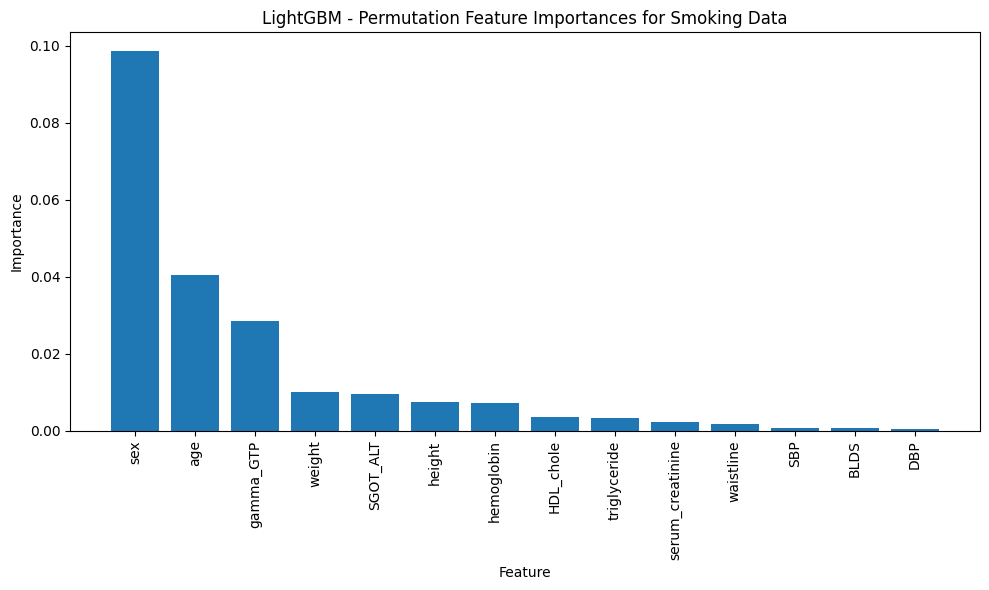


------ LightGBM - Permutation Feature Importances for Smoking Data ------
sex: 0.09857264625332252
age: 0.04050355829706106
gamma_GTP: 0.028607094402049747
weight: 0.01014984692513704
SGOT_ALT: 0.009547130413730832
height: 0.007485789508193408
hemoglobin: 0.0072381461549712815
HDL_chole: 0.003646560985328018
triglyceride: 0.003337889433042973
serum_creatinine: 0.0021253952962893897
waistline: 0.0016644054289878917
SBP: 0.0007651221320529201
BLDS: 0.000609273260065868
DBP: 0.0004574593103309099


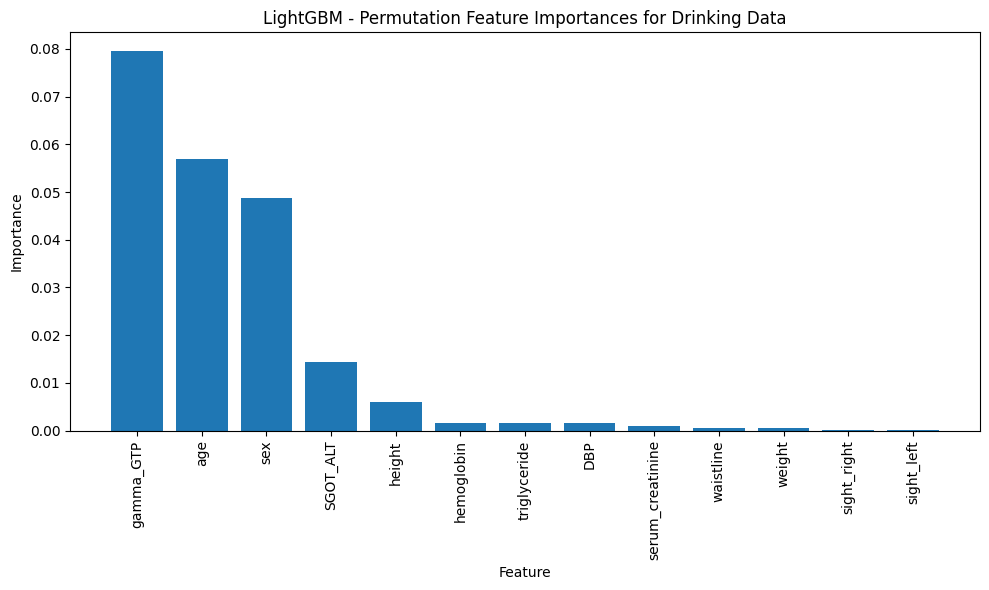


------ LightGBM - Permutation Feature Importances for Drinking Data ------
gamma_GTP: 0.07948897709677252
age: 0.05688433390999094
sex: 0.04872572111626118
SGOT_ALT: 0.014376427984203221
height: 0.006083149660309939
hemoglobin: 0.0015302442641057733
triglyceride: 0.0015141045750974192
DBP: 0.0014893906763033594
serum_creatinine: 0.0008871785301786562
waistline: 0.0005144525871416672
weight: 0.0004403108907594877
sight_right: 7.16198699745818e-05
sight_left: 2.4209533512509207e-05


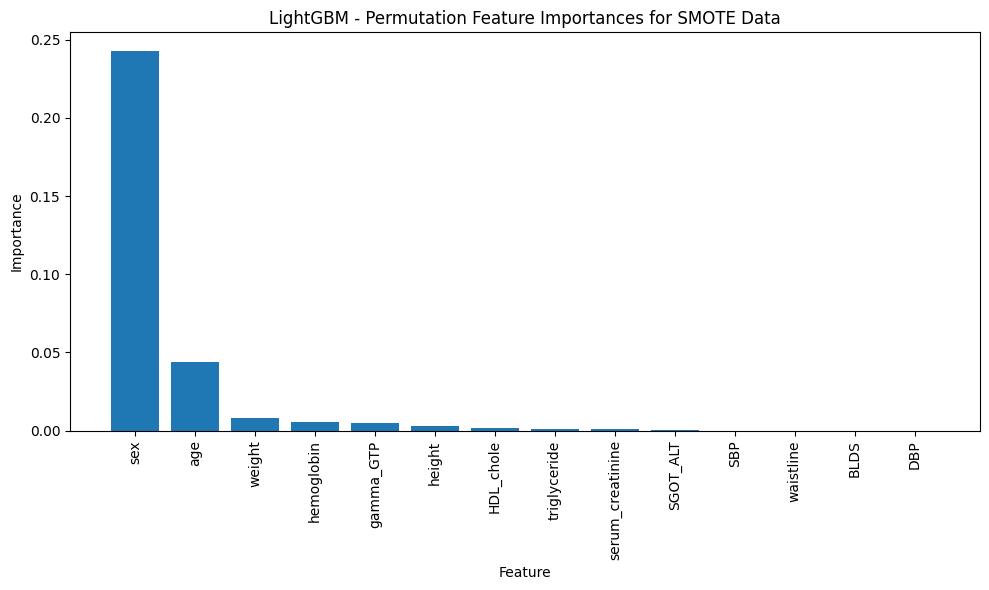


------ LightGBM - Permutation Feature Importances for SMOTE Data ------
sex: 0.2426133182696235
age: 0.04367551155248672
weight: 0.007790426138226303
hemoglobin: 0.005591897876117746
gamma_GTP: 0.0048313150315984375
height: 0.00317699690824077
HDL_chole: 0.0015110783834083486
triglyceride: 0.0009905734128885068
serum_creatinine: 0.0007045982982714971
SGOT_ALT: 0.0006360046199859303
SBP: 5.9010737936793234e-05
waistline: 1.916588069740266e-05
BLDS: 0.0
DBP: 0.0


In [ ]:
feature_importances_smk = plot_permutation_importance(best_lg_smk, X_val_smk, y_val_smk, "LightGBM - Permutation Feature Importances for Smoking Data")
feature_importances_drk = plot_permutation_importance(best_lg_drk, X_val_drk, y_val_drk, "LightGBM - Permutation Feature Importances for Drinking Data")
feature_importances_smote = plot_permutation_importance(best_lg_smote, X_val_smk, y_val_smk, "LightGBM - Permutation Feature Importances for SMOTE Data")

[LightGBM] [Info] Number of positive: 24065, number of negative: 23519
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1740
[LightGBM] [Info] Number of data points in the train set: 47584, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505737 -> initscore=0.022950
[LightGBM] [Info] Start training from score 0.022950
[LightGBM] [Info] Number of positive: 77644, number of negative: 77005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1902
[LightGBM] [Info] Number of data points in the train set: 154649, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502066 -> initscore=0.008264
[Lig

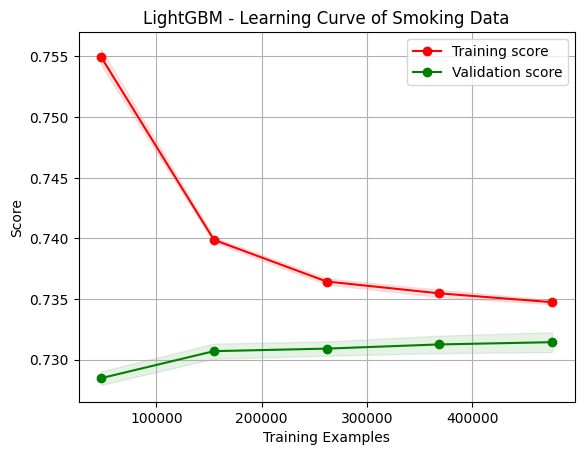

[LightGBM] [Info] Number of positive: 24065, number of negative: 23519
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 47584, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505737 -> initscore=0.022950
[LightGBM] [Info] Start training from score 0.022950
[LightGBM] [Info] Number of positive: 77644, number of negative: 77005
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 154649, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502066 -> initscore=0.008264
[Lig

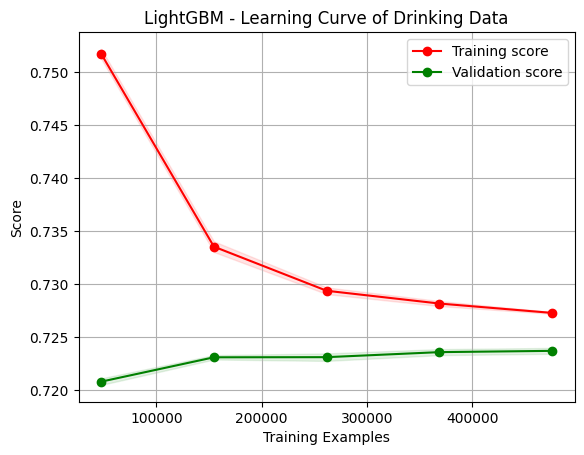

[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 86740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1832
[LightGBM] [Info] Number of data points in the train set: 86740, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the sp

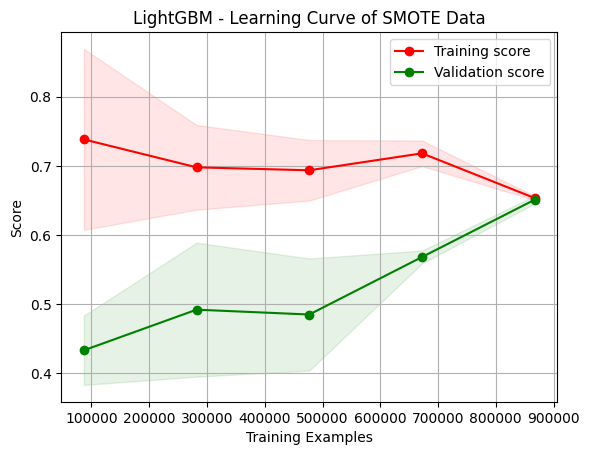

In [ ]:
plot_curve('best_lg_smk.pkl', X_train_smk, y_train_drk, X_val_smk, y_val_smk, "LightGBM - Learning Curve of Smoking Data")
plot_curve('best_lg_drk.pkl', X_train_drk, y_train_drk, X_val_drk, y_val_drk, "LightGBM - Learning Curve of Drinking Data")
plot_curve('best_lg_smote.pkl', X_train_smote, y_train_smote, X_val_smk, y_val_smk, "LightGBM - Learning Curve of SMOTE Data")

## CatBoost

In [ ]:
best_cb_smk = load_model('best_cb_smk.pkl')
best_cb_drk = load_model('best_cb_drk.pkl')
best_cb_smote = load_model('best_cb_smote.pkl')

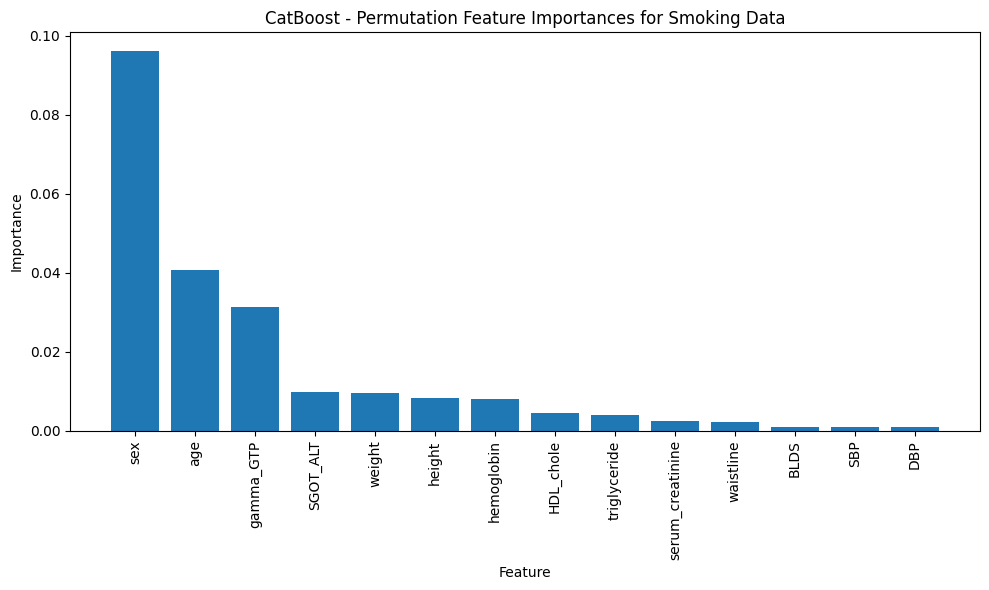


------ CatBoost - Permutation Feature Importances for Smoking Data ------
sex: 0.09605989842083226
age: 0.04067504249277495
gamma_GTP: 0.03125702959111103
SGOT_ALT: 0.009832601163066279
weight: 0.009408429961315145
height: 0.00827612990432186
hemoglobin: 0.007881211888898388
HDL_chole: 0.0043748644518305626
triglyceride: 0.004069219091234577
serum_creatinine: 0.0024280144651962266
waistline: 0.002200041357953042
BLDS: 0.0009693900710650461
SBP: 0.0008765868592669146
DBP: 0.0008533860563173734


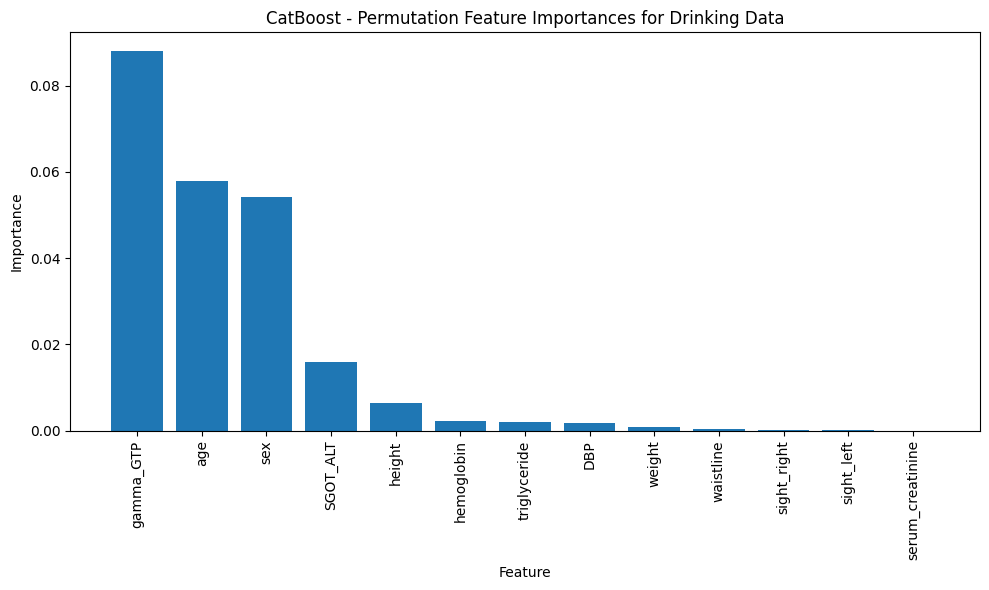


------ CatBoost - Permutation Feature Importances for Drinking Data ------
gamma_GTP: 0.08793356500511929
age: 0.05793391806081634
sex: 0.054233894355648085
SGOT_ALT: 0.01587792342726293
height: 0.006389299386187419
hemoglobin: 0.002246442963852091
triglyceride: 0.001983164286903094
DBP: 0.0016603705067357532
weight: 0.000814045564359489
waistline: 0.0004746077299022433
sight_right: 0.00018611078887769138
sight_left: 5.0436528151109886e-05
serum_creatinine: 0.0


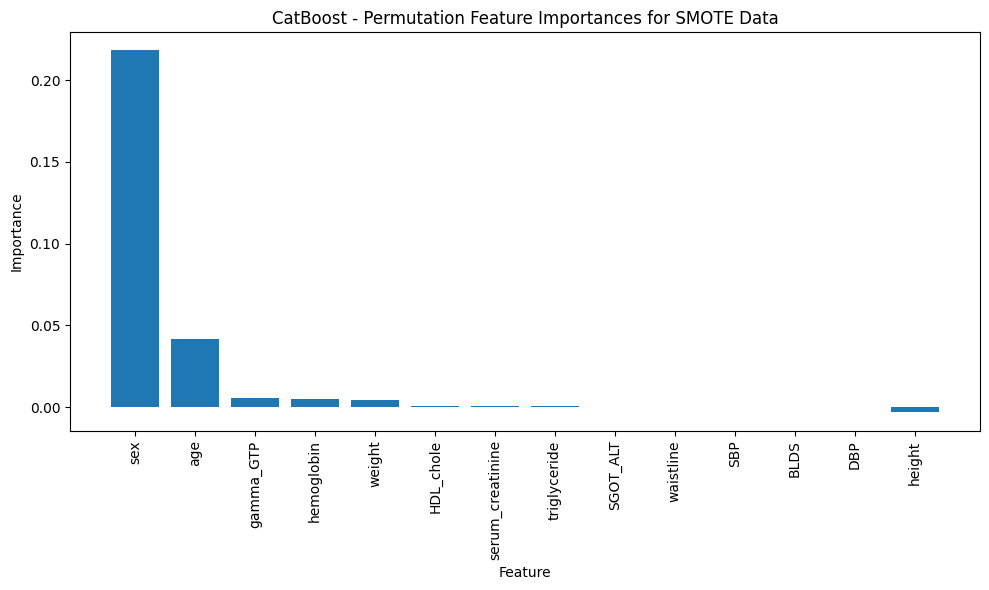


------ CatBoost - Permutation Feature Importances for SMOTE Data ------
sex: 0.21826760613106438
age: 0.04193393823542767
gamma_GTP: 0.005655952266869801
hemoglobin: 0.004813662246745653
weight: 0.004481789891511068
HDL_chole: 0.0008281677922419073
serum_creatinine: 0.0007399038679774094
triglyceride: 0.0006233954879482417
SGOT_ALT: 0.00022242508914660508
waistline: 4.03492225209745e-05
SBP: 0.0
BLDS: 0.0
DBP: 0.0
height: -0.0033242715704421277


In [ ]:
feature_importances_smk = plot_permutation_importance(best_cb_smk, X_val_smk, y_val_smk, "CatBoost - Permutation Feature Importances for Smoking Data")
feature_importances_drk = plot_permutation_importance(best_cb_drk, X_val_drk, y_val_drk, "CatBoost - Permutation Feature Importances for Drinking Data")
feature_importances_smote = plot_permutation_importance(best_cb_smote, X_val_smk, y_val_smk, "CatBoost - Permutation Feature Importances for SMOTE Data")

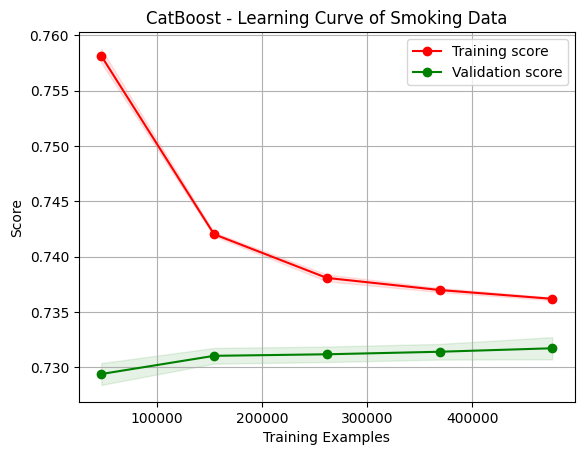

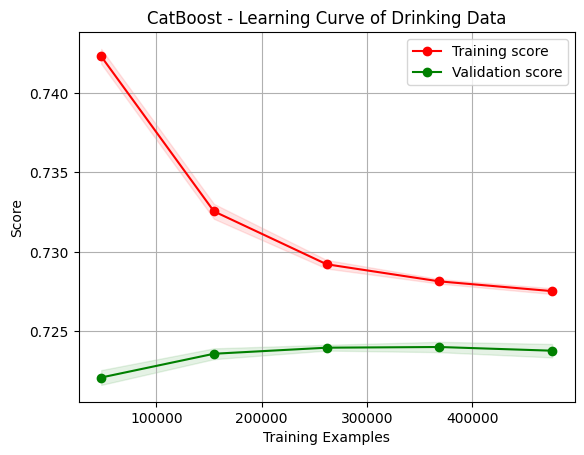

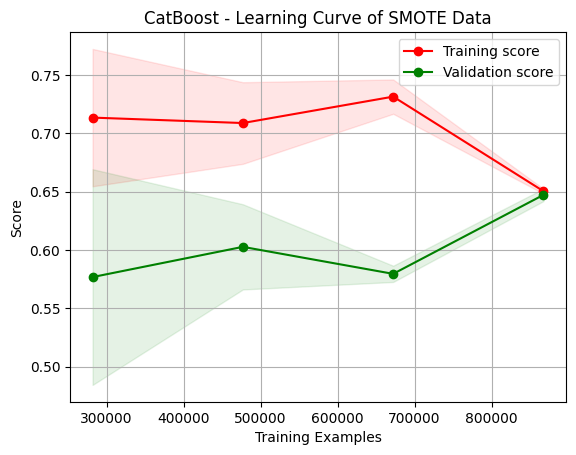

In [ ]:
plot_curve('best_cb_smk.pkl', X_train_smk, y_train_drk, X_val_smk, y_val_smk, "CatBoost - Learning Curve of Smoking Data")
plot_curve('best_cb_drk.pkl', X_train_drk, y_train_drk, X_val_drk, y_val_drk, "CatBoost - Learning Curve of Drinking Data")
plot_curve('best_cb_smote.pkl', X_train_smote, y_train_smote, X_val_smk, y_val_smk, "CatBoost - Learning Curve of SMOTE Data")

# Test evaluation with Final models

## LigthGBM

In [ ]:
y_test_pred_lg_smk = best_lg_smk.predict(X_test_smk)
y_test_pred_lg_drk = best_lg_drk.predict(X_test_drk)
y_test_pred_lg_smote = best_lg_smote.predict(X_test_smk)

In [ ]:
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_test_smk, y_test_pred_lg_smk, best_lg_smk, X_test_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_test_drk, y_test_pred_lg_drk, best_lg_drk, X_test_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_test_smk, y_test_pred_lg_smote, best_lg_smote, X_test_smk)

print("\n----- Final LightGBM of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Final LightGBM of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Final LightGBM of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Final LightGBM of Smoking data -----
Accuracy: 0.6980, Precision: 0.7035, Recall: 0.6980, F1 Score: 0.7001, ROC AUC: 0.8458
Confusion Matrix:
 [[98751 10293 11296]
 [ 8268 14377 12285]
 [ 9515  8224 25261]]

----- Final LightGBM of Drinking data -----
Accuracy: 0.7229, Precision: 0.7120, Recall: 0.7453, F1 Score: 0.7283, ROC AUC: 0.8016
Confusion Matrix:
 [[69699 29783]
 [25157 73631]]

----- Final LightGBM of SMOTE data -----
Accuracy: 0.6759, Precision: 0.7455, Recall: 0.6759, F1 Score: 0.6977, ROC AUC: 0.8350
Confusion Matrix:
 [[87358 15856 17126]
 [ 2164 20127 12639]
 [ 3316 13155 26529]]


## CatBoost

In [ ]:
y_test_pred_cb_smk = best_cb_smk.predict(X_test_smk)
y_test_pred_cb_drk = best_cb_drk.predict(X_test_drk)
y_test_pred_cb_smote = best_cb_smote.predict(X_test_smk)

In [ ]:
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_test_smk, y_test_pred_cb_smk, best_cb_smk, X_test_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_test_drk, y_test_pred_cb_drk, best_cb_drk, X_test_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_test_smk, y_test_pred_cb_smote, best_cb_smote, X_test_smk)

print("\n----- Final Catboost of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Final Catboost of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Final Catboost of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Final Catboost of Smoking data -----
Accuracy: 0.7005, Precision: 0.7060, Recall: 0.7005, F1 Score: 0.7025, ROC AUC: 0.8474
Confusion Matrix:
 [[98936 10161 11243]
 [ 8150 14422 12358]
 [ 9378  8101 25521]]

----- Final Catboost of Drinking data -----
Accuracy: 0.7232, Precision: 0.7116, Recall: 0.7474, F1 Score: 0.7290, ROC AUC: 0.8023
Confusion Matrix:
 [[69554 29928]
 [24957 73831]]

----- Final Catboost of SMOTE data -----
Accuracy: 0.6771, Precision: 0.7457, Recall: 0.6771, F1 Score: 0.6986, ROC AUC: 0.8371
Confusion Matrix:
 [[87532 15946 16862]
 [ 2187 19974 12769]
 [ 3379 12879 26742]]


# Interpret the Model

## Feature Importance using Test set

## 1. LightGBM

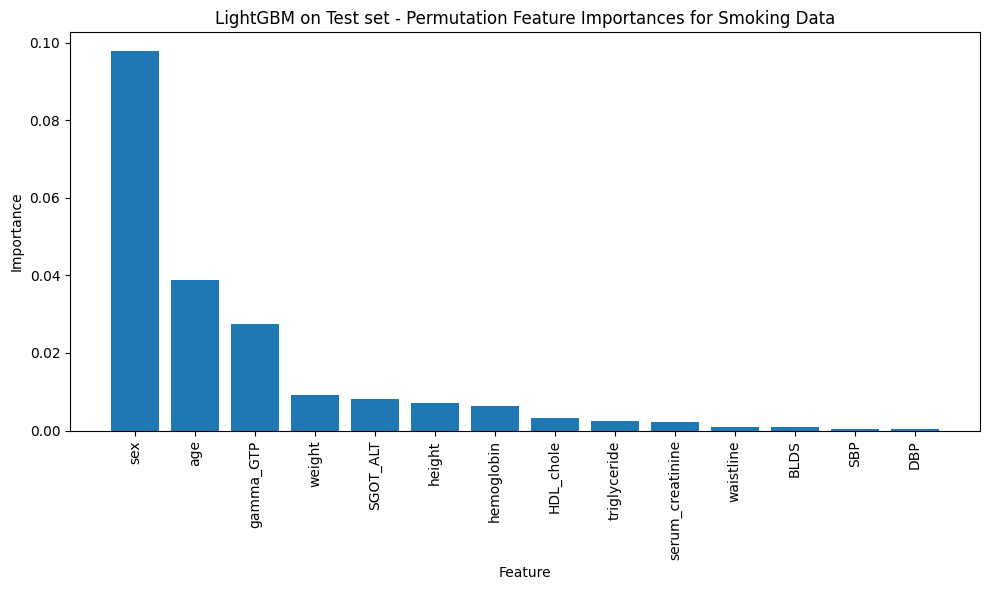


------ LightGBM on Test set - Permutation Feature Importances for Smoking Data ------
sex: 0.09773944620971406
age: 0.03888132344782371
gamma_GTP: 0.027556866898673538
weight: 0.009284813637968436
SGOT_ALT: 0.008166641448529799
height: 0.00714429817925053
hemoglobin: 0.0063146214757653805
HDL_chole: 0.0031275533363595343
triglyceride: 0.0025793110405003318
serum_creatinine: 0.002235840016139623
waistline: 0.0009714026327734993
BLDS: 0.0009497150350532335
SBP: 0.0003878549452766444
DBP: 0.00037575023957231446


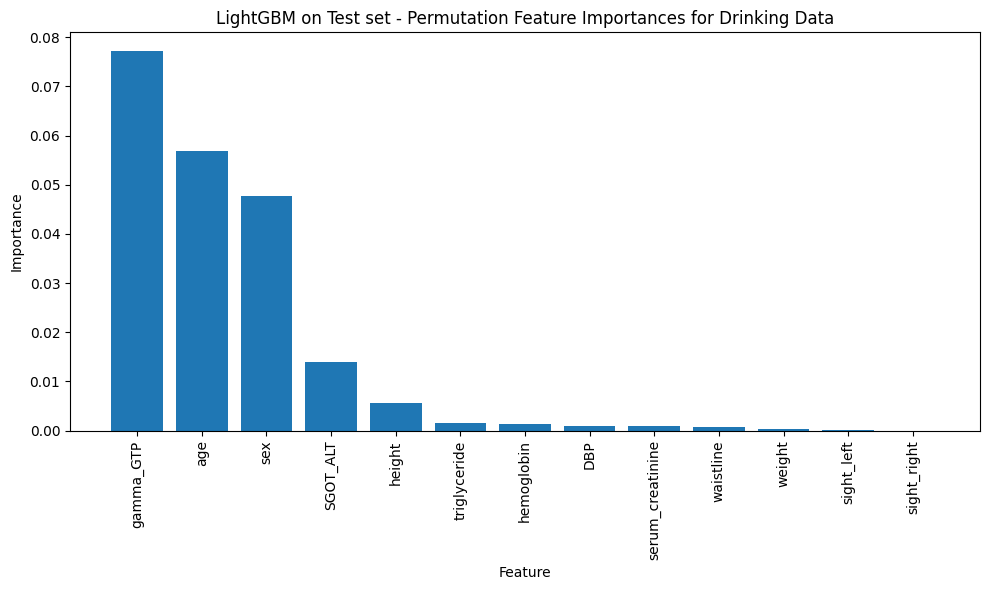


------ LightGBM on Test set - Permutation Feature Importances for Drinking Data ------
gamma_GTP: 0.07712261058153028
age: 0.056852272154133285
sex: 0.0476088162606547
SGOT_ALT: 0.013889645432995446
height: 0.005630705603470054
triglyceride: 0.0014480254198820264
hemoglobin: 0.0013083169415444075
DBP: 0.0009582892015938205
serum_creatinine: 0.0008649820951228682
waistline: 0.0006481061179200553
weight: 0.0003263226912796124
sight_left: 8.120240076665563e-05
sight_right: 1.8661421294230428e-05


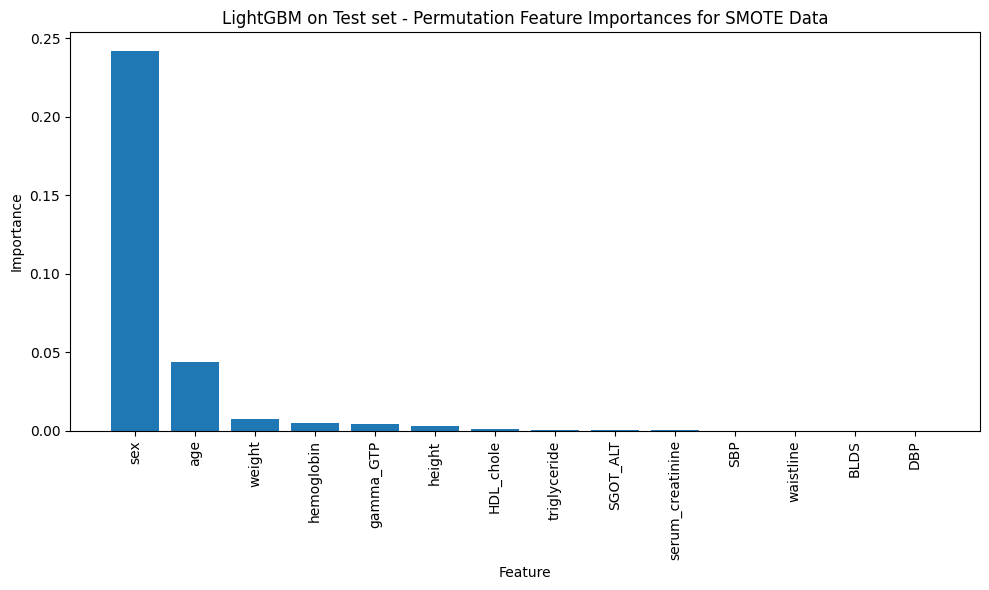


------ LightGBM on Test set - Permutation Feature Importances for SMOTE Data ------
sex: 0.2416386745347253
age: 0.04378978161093453
weight: 0.0072416401876228996
hemoglobin: 0.0048615524285065435
gamma_GTP: 0.003919402834518537
height: 0.0029363998587783823
HDL_chole: 0.001062187925556013
triglyceride: 0.0006773591567054482
SGOT_ALT: 0.0006223836182982501
serum_creatinine: 0.0004625006304533774
SBP: 5.547990114451728e-06
waistline: 3.5305391637097117e-06
BLDS: 0.0
DBP: 0.0


In [ ]:
feature_importances_smk = plot_permutation_importance(best_lg_smk, X_test_smk, y_test_smk, "LightGBM on Test set - Permutation Feature Importances for Smoking Data")
feature_importances_drk = plot_permutation_importance(best_lg_drk, X_test_drk, y_test_drk, "LightGBM on Test set - Permutation Feature Importances for Drinking Data")
feature_importances_smote = plot_permutation_importance(best_lg_smote, X_test_smk, y_test_smk, "LightGBM on Test set - Permutation Feature Importances for SMOTE Data")

## 2. CatBoost

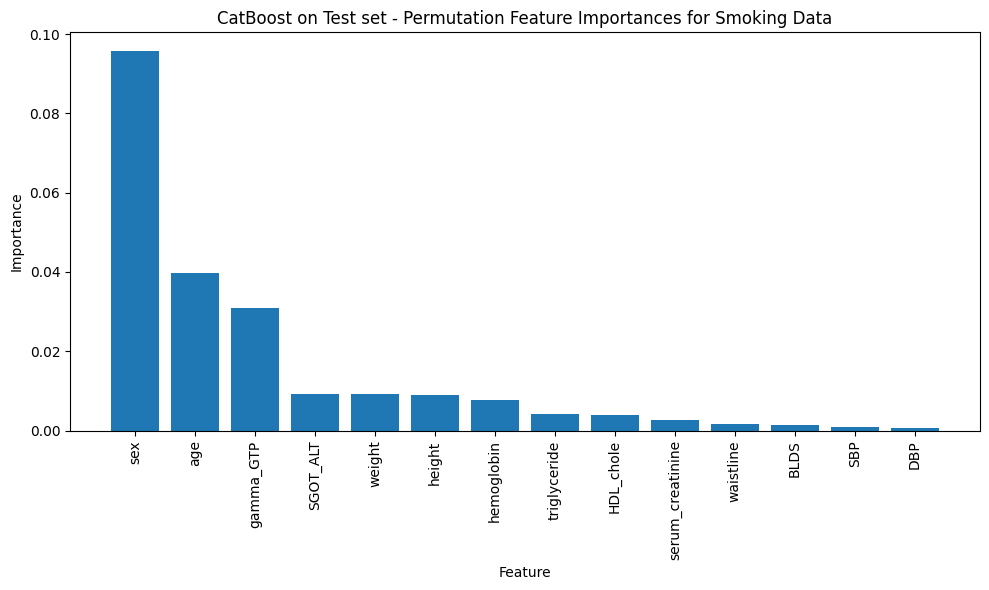


------ CatBoost on Test set - Permutation Feature Importances for Smoking Data ------
sex: 0.09565138447571489
age: 0.039639380642558085
gamma_GTP: 0.030877086800827114
SGOT_ALT: 0.009164270943662633
weight: 0.009147626973319167
height: 0.008857618399152622
hemoglobin: 0.00782468351238208
triglyceride: 0.004129722096131494
HDL_chole: 0.0038240782770968427
serum_creatinine: 0.0026463912846118485
waistline: 0.0017274423765571644
BLDS: 0.0013759015483935655
SBP: 0.0010062036616734326
DBP: 0.0007298128814242633


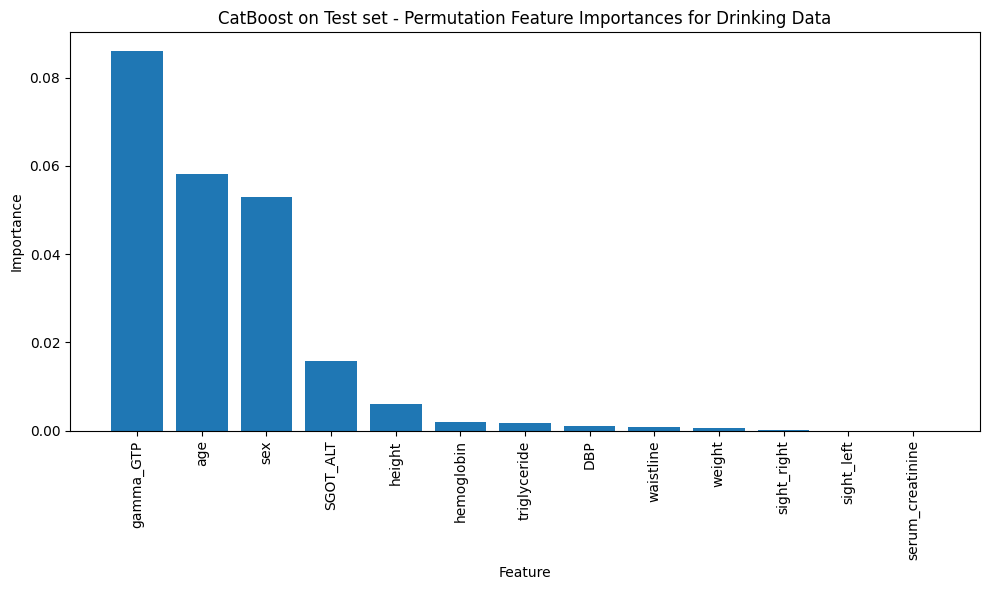


------ CatBoost on Test set - Permutation Feature Importances for Drinking Data ------
gamma_GTP: 0.08596005447117566
age: 0.05820144247742977
sex: 0.052848136379684274
SGOT_ALT: 0.015710394916023586
height: 0.005966611186765525
hemoglobin: 0.0019342310990064005
triglyceride: 0.0017198769354919929
DBP: 0.0010505875825893908
waistline: 0.0007625964593735768
weight: 0.0005194936198113731
sight_right: 3.883593080142855e-05
sight_left: 4.539264639136231e-06
serum_creatinine: 0.0


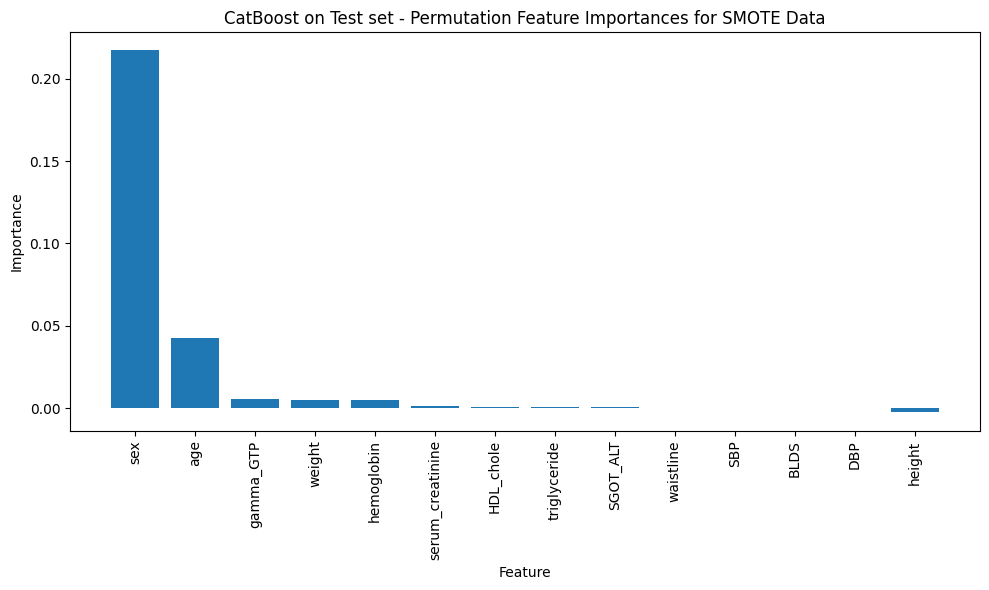


------ CatBoost on Test set - Permutation Feature Importances for SMOTE Data ------
sex: 0.21717809048267514
age: 0.042633782216169855
gamma_GTP: 0.005498562566197585
weight: 0.0050118525243354915
hemoglobin: 0.004804055076410918
serum_creatinine: 0.0012533414031371203
HDL_chole: 0.00098855096585464
triglyceride: 0.0009053311141372866
SGOT_ALT: 0.000625409794724352
waistline: 0.00011902960609269097
SBP: 0.0
BLDS: 0.0
DBP: 0.0
height: -0.0026398345690220593


In [ ]:
feature_importances_smk = plot_permutation_importance(best_cb_smk, X_test_smk, y_test_smk, "CatBoost on Test set - Permutation Feature Importances for Smoking Data")
feature_importances_drk = plot_permutation_importance(best_cb_drk, X_test_drk, y_test_drk, "CatBoost on Test set - Permutation Feature Importances for Drinking Data")
feature_importances_smote = plot_permutation_importance(best_cb_smote, X_test_smk, y_test_smk, "CatBoost on Test set - Permutation Feature Importances for SMOTE Data")

# SHAP  (SHapley Additive exPlanations) using Our Final Model - CatBoost

In [ ]:
pip install shap

In [ ]:
import shap

In [ ]:
explainer_smk = shap.TreeExplainer(best_cb_smk)
shap_values_smk = explainer_smk.shap_values(X_test_smk)
shap.summary_plot(shap_values_smk, X_test_smk, plot_type="dot")
shap.summary_plot(shap_values_smk, X_test_smk, plot_type="violin")

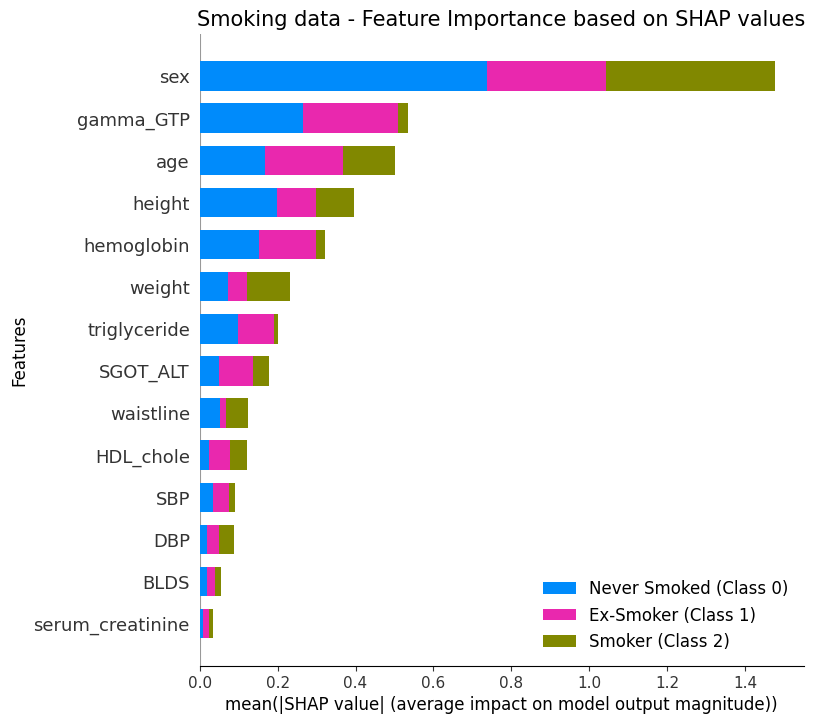

In [ ]:
explainer_smk = shap.TreeExplainer(best_cb_smk)

shap_values_smk = explainer_smk.shap_values(X_test_smk)

shap.summary_plot(shap_values_smk, X_test_smk, plot_type="bar", show=False)

plt.title('Smoking data - Feature Importance based on SHAP values', fontsize=15)
plt.xlabel('mean(|SHAP value| (average impact on model output magnitude))', fontsize=12)
plt.ylabel('Features', fontsize=12)

ax = plt.gca()
legend = ax.get_legend()

new_labels = ['Never Smoked (Class 0)', 'Ex-Smoker (Class 1)', 'Smoker (Class 2)']

if legend is not None and len(legend.texts) == len(new_labels):
    for text, label in zip(legend.texts, new_labels):
        text.set_text(label)

plt.show()

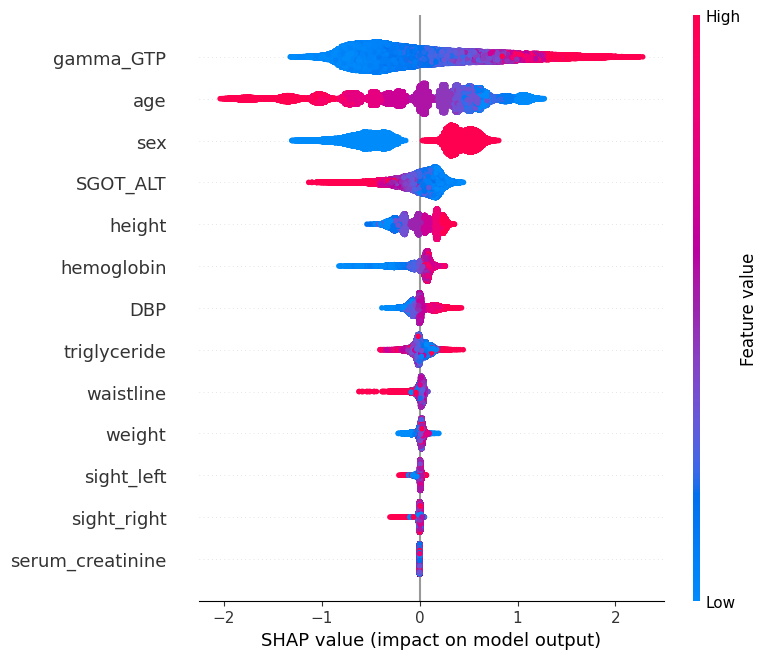

In [ ]:
# Explainer for the drinking dataset model
explainer_drk = shap.TreeExplainer(best_cb_drk)
shap_values_drk = explainer_drk.shap_values(X_test_drk)
shap.summary_plot(shap_values_drk, X_test_drk, plot_type="dot")

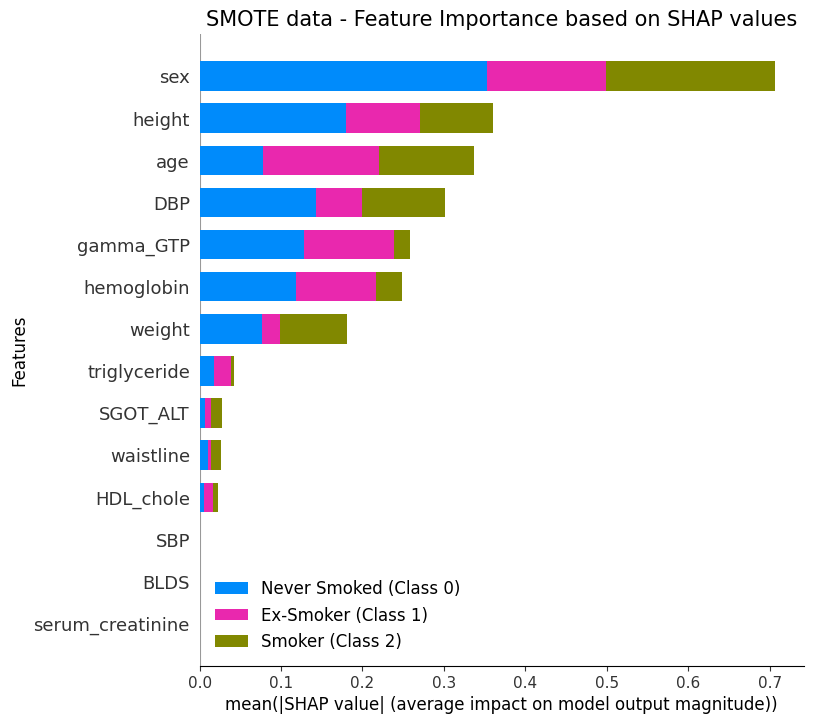

In [ ]:
explainer_smk = shap.TreeExplainer(best_cb_smote)

shap_values_smote = explainer_smk.shap_values(X_test_smk)

shap.summary_plot(shap_values_smote, X_test_smk, plot_type="bar", show=False)

plt.title('SMOTE data - Feature Importance based on SHAP values', fontsize=15)
plt.xlabel('mean(|SHAP value| (average impact on model output magnitude))', fontsize=12)
plt.ylabel('Features', fontsize=12)

ax = plt.gca()
legend = ax.get_legend()

new_labels = ['Never Smoked (Class 0)', 'Ex-Smoker (Class 1)', 'Smoker (Class 2)']

if legend is not None and len(legend.texts) == len(new_labels):
    for text, label in zip(legend.texts, new_labels):
        text.set_text(label)

plt.show()

# Research Questions & Answers

1. What are the top three features that most significantly influence smoking, drinking, and SMOTE datasets, according to the final CatBoost model, and how do they differ?
Answer:

- Smoking Data: The top three features influencing smoking behavior are sex (0.09565), age (0.03964), and gamma-GTP (0.03088). These features suggest that biological sex, age, and liver enzyme levels are significant indicators of smoking habits.
- Drinking Data: For drinking behavior, the top three features are gamma-GTP (0.08596), age (0.05820), and sex (0.05285). This indicates that liver function tests, again alongside age and sex, are predominant factors in predicting drinking behavior.
- SMOTE Data: In the balanced SMOTE dataset, the top three features are sex (0.21718), age (0.04263), and gamma-GTP (0.00550). It is notable that sex has a much larger impact in the SMOTE dataset, possibly indicating that balancing classes made the predictive model more sensitive to the sex feature.

The differences between the smoking and SMOTE datasets' feature importance could be due to the SMOTE technique addressing class imbalance by creating synthetic samples, which may accentuate the importance of certain features like sex that are not equally represented across classes.

2. How does the SMOTE technique work, and was it efficient in handling the imbalanced target feature in the smoking data?

- The Synthetic Minority Over-sampling Technique (SMOTE) works by creating synthetic instances of the minority class to balance the dataset. It does this by finding the k-nearest neighbors for minority class samples and generating new samples that are interpolations of the minority class samples and their neighbors.

- For the smoking data, the SMOTE approach was moderately effective. It improved the balance of the dataset, as evidenced by the increased importance of the sex feature in the balanced dataset, suggesting a more nuanced model. However, it did not drastically improve the model's accuracy (0.6771 post-SMOTE vs. original data's accuracy), pointing to the fact that while helpful, SMOTE cannot completely mitigate the inherent challenges of predictive modeling in complex behaviors such as smoking and drinking.



3. What are the differences in predictive performance and feature importance between the smoking and SMOTE-augmented datasets?

- The model's accuracy decreased slightly from 0.7005 to 0.6771 when using SMOTE, suggesting that while SMOTE addresses class imbalance, it may introduce synthetic noise affecting generalization. The precision increased with SMOTE, indicating better identification of true positives, but recall decreased, suggesting that some actual positives were missed. The F1 score and ROC AUC also decreased, indicating a balance trade-off.

- In terms of feature importance, 'sex' became more prominent in the SMOTE data, potentially due to its overemphasis during synthetic sample generation. This suggests that the feature distributions, particularly 'sex,' might be imbalanced within classes, and SMOTE's balancing act exaggerates this aspect.

- Overall, while SMOTE improves class balance, it also changes the model's sensitivity to certain features, which must be considered in practical applications.







# Limitations and Future Developmnets

1. External Validity:
- The model is trained on a specific dataset from NHIS Korea. The patterns learned may not generalize to populations with different demographics or health behaviors. -> Future work could involve validating the model on datasets from different regions or demographics to improve its external validity.
2. Incorporating Behavioral and Temporal Contexts:
- Enhancing the model's predictive power for smoking and drinking behaviors requires a dataset that captures not just biological factors but also the evolving psychosocial context. -> Adding time-series data and psychosocial variables could address the temporal and behavioral complexities that influence these health-related behaviors.
3. Mid-age concentration:
- The data's age distribution indicates a concentration of mid-age individuals, which could limit the data's representativeness for all age groups. This skew may affect the model's performance on underrepresented ages, reducing its generalizability. -> Future data collection efforts should strive for a balanced age representation to mitigate this limitation.

4. Using SMOTE:
- The use of SMOTE suggests you are dealing with class imbalance. While SMOTE can help, it artificially inflates the minority class and can introduce bias. Future models could benefit from exploring alternative approaches like targeted data collection to naturally balance the classes, or employing cost-sensitive learning where the model is penalized more for misclassifying the minority class.



---

